# Hands-on Deep Generative Models

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/landerlini/mlinfn-advanced-hackathon/tutorial_gen_models.ipynb)
[![Open In Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/landerlini/mlinfn-advanced-hackathon/tutorial_gen_models.ipynb)
[![Open in GitHub](https://img.shields.io/badge/Open_in_GitHub-blue?style=flat&logo=github&logoColor=white&labelColor=555)](https://github.com/landerlini/mlinfn-advanced-hackathon/tutorial_gen_models.ipynb)

<div class="alert alert-block alert-info">
  <b>Authors:</b> M. Barbetti (INFN-CNAF), S. Capelli (INFN-MiB), F. Vaselli (INFN-Pisa)

  <b>Date created:</b> 30/10/2023

  <b>Last modified:</b> 10/11/2023
  
  <b>Description: </b> This hands-on demonstrates how deep generative models succeed in reproducing the high-level response of a generic HEP experiment, offering a viable solution to reduce the pressure on the computing budget for simulation production. In particular, in this notebook we will test the performance of Generative Adversarial Networks and Normalizing Flows to parameterize the errors introduced during the detection and reconstruction of high-energy particle jets using the CMS detector.
</div>

## Introduction

### The Compact Muon Solenoid (CMS) experiment

The [**CMS experiment**](https://cms.cern) is a key research project at the Large Hadron Collider (LHC). It's a particle physics detector that observes and measures the byproducts of high-energy particle collisions in the LHC. CMS is designed to investigate a wide range of physics phenomena, and it played a pivotal role in the discovery of the Higgs boson in 2012.

CMS is a general-purpose detector, meaning it's equipped to study various aspects of particle physics. Its main components include a superconducting solenoid magnet, various particle detectors, and systems for **tracking**, **energy measurement**, and **muon detection**. This sophisticated setup allows scientists to explore several key questions in fundamental physics, such as the properties of the Higgs boson, the search for supersymmetry, the nature of dark matter, and potential evidence of extra dimensions.

<div align="center">
  <img alt="CMS detector" src="https://cmsexperiment.web.cern.ch/sites/cmsexperiment.web.cern.ch/files/cms_160312_02.png" width="800"/>
</div>

#### Measuring jets at CMS

In CMS, particle jets are crucial for understanding high-energy processes. They are sprays of particles formed when quarks and gluons, produced in high-energy collisions like those at the LHC, [_hadronize_](https://en.wikipedia.org/wiki/Hadronization) or turn into ordinary matter. By analyzing the jets' energy and momentum, physicists can infer properties of the original particles, helping in studies like proton structure, the strong force, and new physics beyond the Standard Model.

<div align="center">
  <img alt="Particle jet" src="https://cms.cern/sites/default/files/field/image/Sketch_PartonParticleCaloJet.png" width="800"/>
</div>

### Deep Generative Models

#### Generative Adversarial Networks

Generative Adversarial Networks (GAN) [[1][1]] are a powerful class of _generative models_ based on the simultaneous training of two neural networks:

*  **Discriminator network** ($D$) - trained by a classification task to separate the generator output from the reference dataset
* **Generator network** ($G$) - trained by a simulation task to reproduce the reference dataset trying to fake the discriminator

The goal is that $D$ optimally discriminates on the origin of the two samples, and simultaneously the training procedure for $G$ is to maximize the _probability_ of $D$ making a mistake. This framework corresponds to a **minimax two-player game** [[1][1]].

[1]: https://arxiv.org/abs/1406.2661

<div align="center">
  <img src="https://raw.githubusercontent.com/mbarbetti/pidgan-notebooks/main/.github/images/gan-scheme.png" width="800"/>
</div>

##### Additional details

Traditional GAN systems suffer from many issues, particularly during the training phase:

* the generator may _collapse_ producing only a single sample or a small family of very similar samples (**mode collapse**)
* the two players may _oscillate_ during training rather than converging to the [**Nash equilibrium**](https://en.wikipedia.org/wiki/Nash_equilibrium)
* if _imbalance_ between the two players occurs, then the system is incapable of learning at all

All these drawbacks result from the [**vanishing gradient problem**](https://en.wikipedia.org/wiki/Vanishing_gradient_problem), namely the lack of information for the update of the $G$ parameters. This is due to the saturation of the $D$ that is so good in distinguishing the origin of the two samples that no errors remain to the $G$ to improve the generated space [[2][2]]. To fix such problem, the typical solution proposed by the literature is to change the loss function that drive the training procedure [[3][3], [4][4]], to force the smoothness of the discriminator response to the classification task [[5][5], [6][6], [7][7]], or to adoopt a set of strategies in the architecture of the two players [[8][8]]. Each of these solutions can be easily implemented through [pidgan](https://github.com/mbarbetti/pidgan), a Python package designed to simplify the provisioning of GAN-based models to flash-simulate the LHCb experiment.

[2]: https://arxiv.org/abs/1701.04862
[3]: https://arxiv.org/abs/1611.04076
[4]: https://arxiv.org/abs/1701.07875
[5]: https://arxiv.org/abs/1704.00028
[6]: https://arxiv.org/abs/1705.10743
[7]: https://arxiv.org/abs/1907.05681
[8]: https://arxiv.org/abs/1606.03498
[9]: https://arxiv.org/abs/1411.1784

#### Normalizing Flows

GANs do not explicitly learn $p(\mathbf{x})$, the probability density function of real data $-$ it can be really hard to! Taking the generative model with latent variables as an example, $p(\mathbf{x}) = \int p(\mathbf{x}\vert\mathbf{z})p(\mathbf{z})d\mathbf{z}$ can hardly be calculated as it is intractable to go through all possible values of the latent code.

Flow-based deep generative models conquer this hard problem with the help of normalizing flows [[9][9]], a powerful statistics tool for _density estimation_. A good estimation of $p(\mathbf{x})$ makes it possible to efficiently complete many downstream tasks: sample unobserved but realistic new data points (**data generation**), predict the rareness of future events (density estimation), infer latent variables, fill in incomplete data samples, etc.

Here comes a Normalizing Flows (NF) model for better and more powerful distribution approximation [[9][9]]. A normalizing flow transforms a simple distribution into a complex one by applying a sequence of invertible transformation functions. Flowing through a chain of transformations, we repeatedly substitute the variable for the new one according to the **change of variables theorem** and eventually obtain a probability distribution of the final target variable. During training we learn $z=f(x)$ sending data into the Gaussian space, then we can invert $f$ to get new samples $\hat{x}= f^{-1}(z)$.

Normalizing flows can be easily implemented through [nflows](https://github.com/bayesiains/nflows), a Python package that offers a comprehensive collection of flow-based models.

[9]: https://arxiv.org/abs/1912.02762

<div align="center">
  <img src="https://lilianweng.github.io/posts/2018-10-13-flow-models/normalizing-flow.png" width="800"/>
</div>

## Hands-on generative models with CMS data

In High Energy Physics (HEP), simulations are crucial for understanding the outcomes of particle collisions, like those observed in the CMS experiment. The general simulation process involves several steps:

1. **Event generation** - simulating the initial high-energy collision and the primary processes that follow
2. **Particle tracking and interaction** - simulating how the particles produced in the collision travel through and interact with the detector material
3. **Detector response** - modeling how the detector responds to these particles
4. **Data reconstruction** - processing the simulated detector signals to reconstruct what happened in the collision

These steps are computationally expensive due to the complex physics involved and the high precision required. Each collision can produce a multitude of particles, making the simulation of even a single event a resource-intensive task.

Machine Learning (ML) can significantly speed up this process, particularly the reconstruction phase. By training models to emulate the behavior of particles in the detector and their interaction, we can bypass the need for detailed, step-by-step simulation, reducing computation time and resource usage.

In this exercise, we aim to simulate _reconstruction-level_ (reco-level) jets from _generator-level_ (gen-level) data. For this purpose, we have prepared a root file containing about 1.2M pairs of genjets and their associated recojets as produced by detailed simulation.

<div class="alert alert-block alert-success">
<b>Problem statement:</b> Learn to generate the features of recojets given the values of the associated genjet features. This exercise will involve predicting the properties of the recojets (like momentum, pseudorapidity, etc.) based on the known properties of the genjets.
</div>

### Setup

Initial setup for your ML-INFN instance (not needed if you are running on [Colab](https://colab.research.google.com) or [Kaggle](https://www.kaggle.com)).

**Note:** If you plan to run this notebook live during the hands-on, we suggest to set `True` the variable `LIVE` in order to limit the execution time of the whole notebook to about 15 minutes. Obviously, the resulting parameterizations will show suboptimal performance.

In [1]:
LIVE = True  # suboptimal model if True

import os, subprocess, re
os.environ["CUDA_VISIBLE_DEVICES"] = "".join(
  re.findall(
    "UUID: (MIG-[^)]+)\)",
    str(subprocess.check_output(["nvidia-smi", "-L"]), "ascii")
  )
)

### Prerequisites

The first step is to import the main packages of this hands-on, namely [pidgan](https://github.com/mbarbetti/pidgan) and [nflows](https://github.com/bayesiains/nflows). If you are running out of the provided ML-INFN instances (like [Colab](https://colab.research.google.com) or [Kaggle](https://www.kaggle.com)), before to run the following code cells, you need to install the both the packages and some other ones that are typically needed in machine learning applications to HEP (i.e., uproot, scipy, scikit-learn, matplotlib). This can be done adding a new code cell containing what follows:

```
%%capture
!pip install pidgan[hep] nflows corner
```

Let's verify the correct installation of [pidgan](https://github.com/mbarbetti/pidgan) printing its version:

In [2]:
import pidgan

pidgan.__version__

'0.1.1'

Since [pidgan](https://github.com/mbarbetti/pidgan) relies on TensorFlow and Keras as backends, we also need to verify the correct installation of TensorFlow checking that it is able to assess and run on the equipped GPU (if any):

In [3]:
import tensorflow as tf

avail_gpus = tf.config.list_physical_devices("GPU")
avail_gpus  # outputs a non-empty list in case of GPU equipped

2023-11-10 14:45:36.180688: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-10 14:45:36.180758: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-10 14:45:36.180780: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-10 14:45:36.188851: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Now, let's verify the correct installation of [nflows](https://github.com/bayesiains/nflows) printing its version:

In [4]:
from nflows import version

version.__version__

'0.14'

Since [nflows](https://github.com/bayesiains/nflows) relies on PyTroch as backend, we also need to verify the correct installation of PyTorch checking that it is able to assess and run on the equipped GPU (if any):

In [5]:
import torch

torch.cuda.init()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)

rnd = torch.randn((100, 1)).to(device)  # random number loaded on GPU

Finally, we just have to import all the modules that we will use in the following code cells:

In [6]:
import uproot
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer, StandardScaler, LabelEncoder, OneHotEncoder

### Data loading and preparation

The data needed for this hands-on is provided within the `data` folder as a root file (`'cms_data.root'`). The dataset contains about 1.2M instances, 5 input features and 5 output features. Let's import the data as a pandas [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html):

In [7]:
with uproot.open("./data/cms_data.root") as file:
  data = file["recojet"].arrays(library="pd").drop("index", axis=1)

data.describe()

,pT,eta,phi,E,flavour,reco_pT,reco_eta,reco_phi,reco_nConstituents,b_tag
count,1.173006e+06,1.173006e+06,1.173006e+06,1.173006e+06,1.173006e+06,1.173006e+06,1.173006e+06,1.173006e+06,1.173006e+06,1.173006e+06
mean,5.774316e+01,-3.606635e-03,3.142674e+00,1.820326e+02,-1.751057e-03,5.823546e+01,-3.583049e-03,3.142717e+00,1.772764e+01,3.891182e-01
std,4.740463e+01,1.698428e+00,1.813134e+00,2.612149e+02,2.957189e+00,4.954559e+01,1.698818e+00,1.813508e+00,8.978564e+00,3.799157e-01
min,1.500001e+01,-6.247127e+00,1.370349e-06,1.511571e+01,-5.000000e+00,-2.736475e+00,-6.225502e+00,1.377906e-06,0.000000e+00,3.145769e-05
25%,2.606500e+01,-1.156958e+00,1.575168e+00,5.171500e+01,0.000000e+00,2.604108e+01,-1.156651e+00,1.574912e+00,1.100000e+01,5.980294e-02
50%,4.404862e+01,-4.191196e-03,3.141528e+00,9.736305e+01,0.000000e+00,4.390334e+01,-4.189691e-03,3.141232e+00,1.600000e+01,1.744231e-01
75%,7.374522e+01,1.150521e+00,4.711539e+00,1.969485e+02,0.000000e+00,7.428231e+01,1.150217e+00,4.712032e+00,2.300000e+01,8.527536e-01
max,1.568434e+03,6.298655e+00,6.283185e+00,5.069652e+03,5.000000e+00,1.915857e+03,6.525997e+00,6.533353e+00,1.100000e+02,9.999949e-01


**Note:** If you are running out of the provided ML-INFN instances (like [Colab](https://colab.research.google.com) or [Kaggle](https://www.kaggle.com)), a reduced version of the original dataset is available through a CSV file and can be imported as a pandas [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) using the following code lines:

```python
url = "https://raw.githubusercontent.com/landerlini/mlinfn-advanced-hackathon/main/generative_models/data/cms_data_reduced.csv"
data = pd.read_csv(url)
```

#### Generator-level features

* `data.pT` - transverse momentum $p_T$ in GeV/$c$ of the jet
* `data.eta` - pseudorapidity $\eta$ of the jet
* `data.phi` - angle $\varphi$ in the x-y plane of the jet
* `data.E` - energy $E$ in GeV of the jet
* `data.flavour` - flavour of the jet (-6: $\bar{b}$, -4: $\bar{c}$, 0: $g$, 4: $c$)

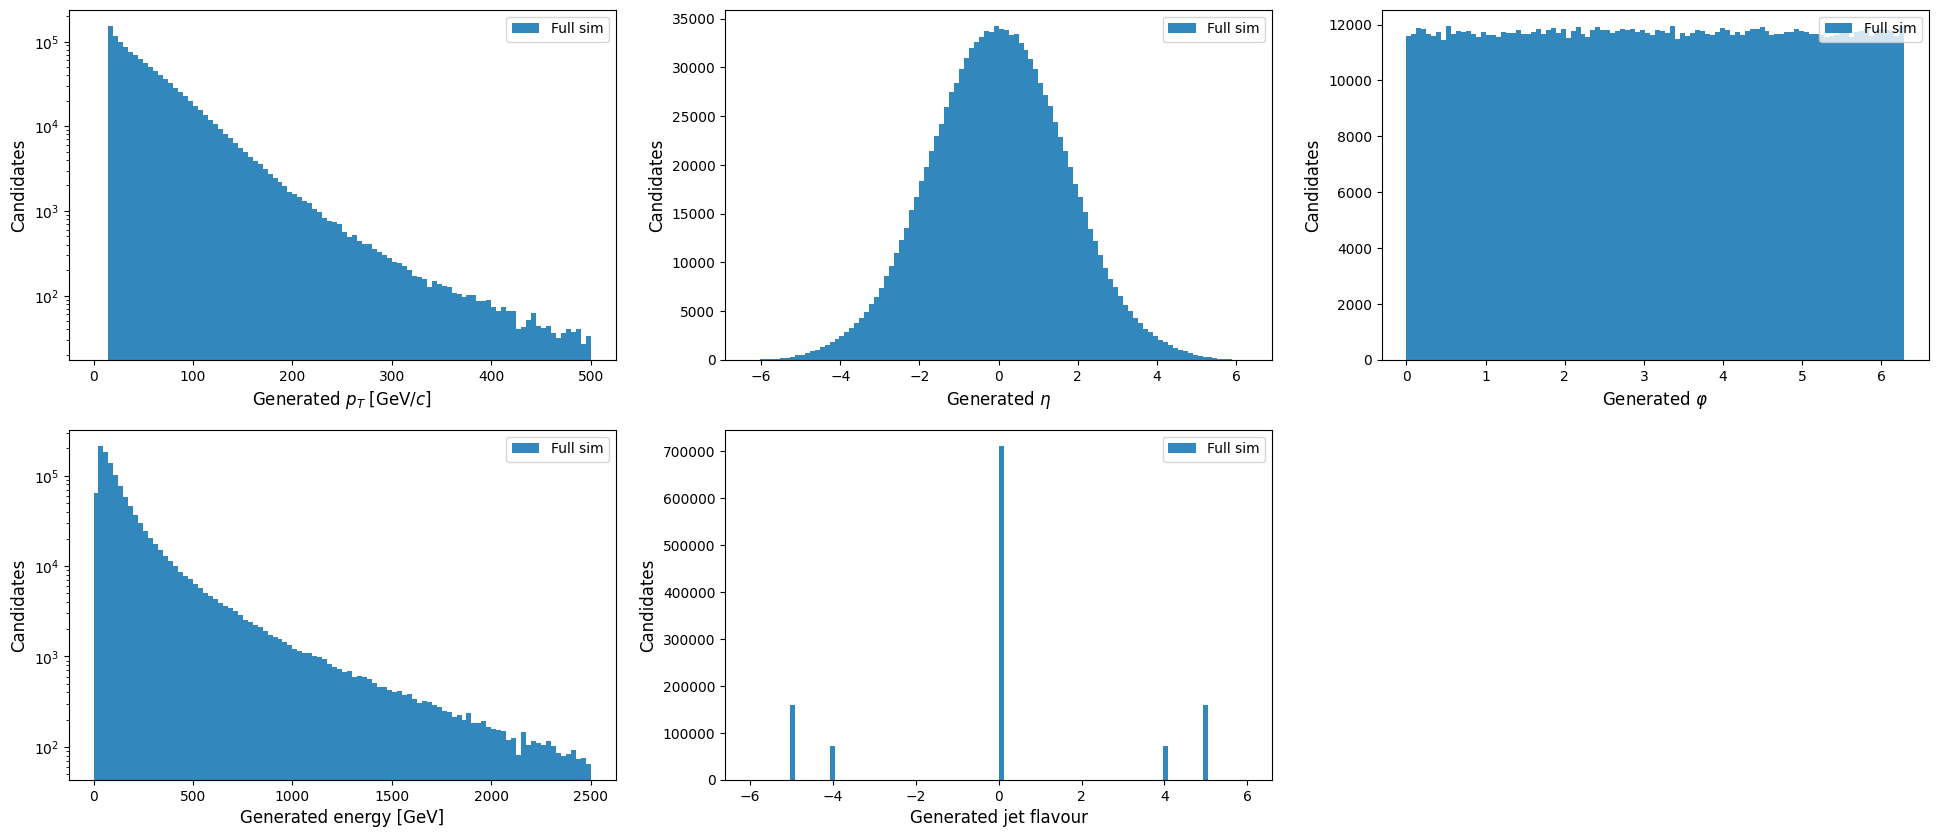

In [8]:
plt.figure(figsize=(24, 10), dpi=100)

plt.subplot(2, 3, 1)
plt.xlabel("Generated $p_T$ [GeV/$c$]", fontsize=12)
plt.ylabel("Candidates", fontsize=12)
plt.hist(data["pT"], bins=np.linspace(0.0, 500.0, 101), color="#3288bd", label="Full sim")
plt.legend(loc="upper right", fontsize=10)
plt.yscale("log")

plt.subplot(2, 3, 2)
plt.xlabel(r"Generated $\eta$", fontsize=12)
plt.ylabel("Candidates", fontsize=12)
plt.hist(data["eta"], bins=np.linspace(-2*np.pi, 2*np.pi, 101), color="#3288bd", label="Full sim")
plt.legend(loc="upper right", fontsize=10)

plt.subplot(2, 3, 3)
plt.xlabel(r"Generated $\varphi$", fontsize=12)
plt.ylabel("Candidates", fontsize=12)
plt.hist(data["phi"], bins=np.linspace(0.0, 2*np.pi, 101), color="#3288bd", label="Full sim")
plt.legend(loc="upper right", fontsize=10)

plt.subplot(2, 3, 4)
plt.xlabel("Generated energy [GeV]", fontsize=12)
plt.ylabel("Candidates", fontsize=12)
plt.hist(data["E"], bins=np.linspace(0.0, 2500.0, 101), color="#3288bd", label="Full sim")
plt.legend(loc="upper right", fontsize=10)
plt.yscale("log")

plt.subplot(2, 3, 5)
plt.xlabel("Generated jet flavour", fontsize=12)
plt.ylabel("Candidates", fontsize=12)
plt.hist(data["flavour"], bins=np.linspace(-6.0, 6.0, 101), color="#3288bd", label="Full sim")
plt.legend(loc="upper right", fontsize=10)

plt.show()

#### Reconstructed-level features

* `data.reco_pT` - reconstructed transverse momentum $p_T$ in GeV/$c$ of the jet
* `data.reco_eta` - reconstructed pseudorapidity $\eta$ of the jet
* `data.reco_phi` - reconstructed angle $\varphi$ in the x-y plane of the jet
* `data.reco_nConstituents` - reconstructed number of particles within the jet
* `data.b_tag` - output of a multivariate classifier trained to identify $b$-jets

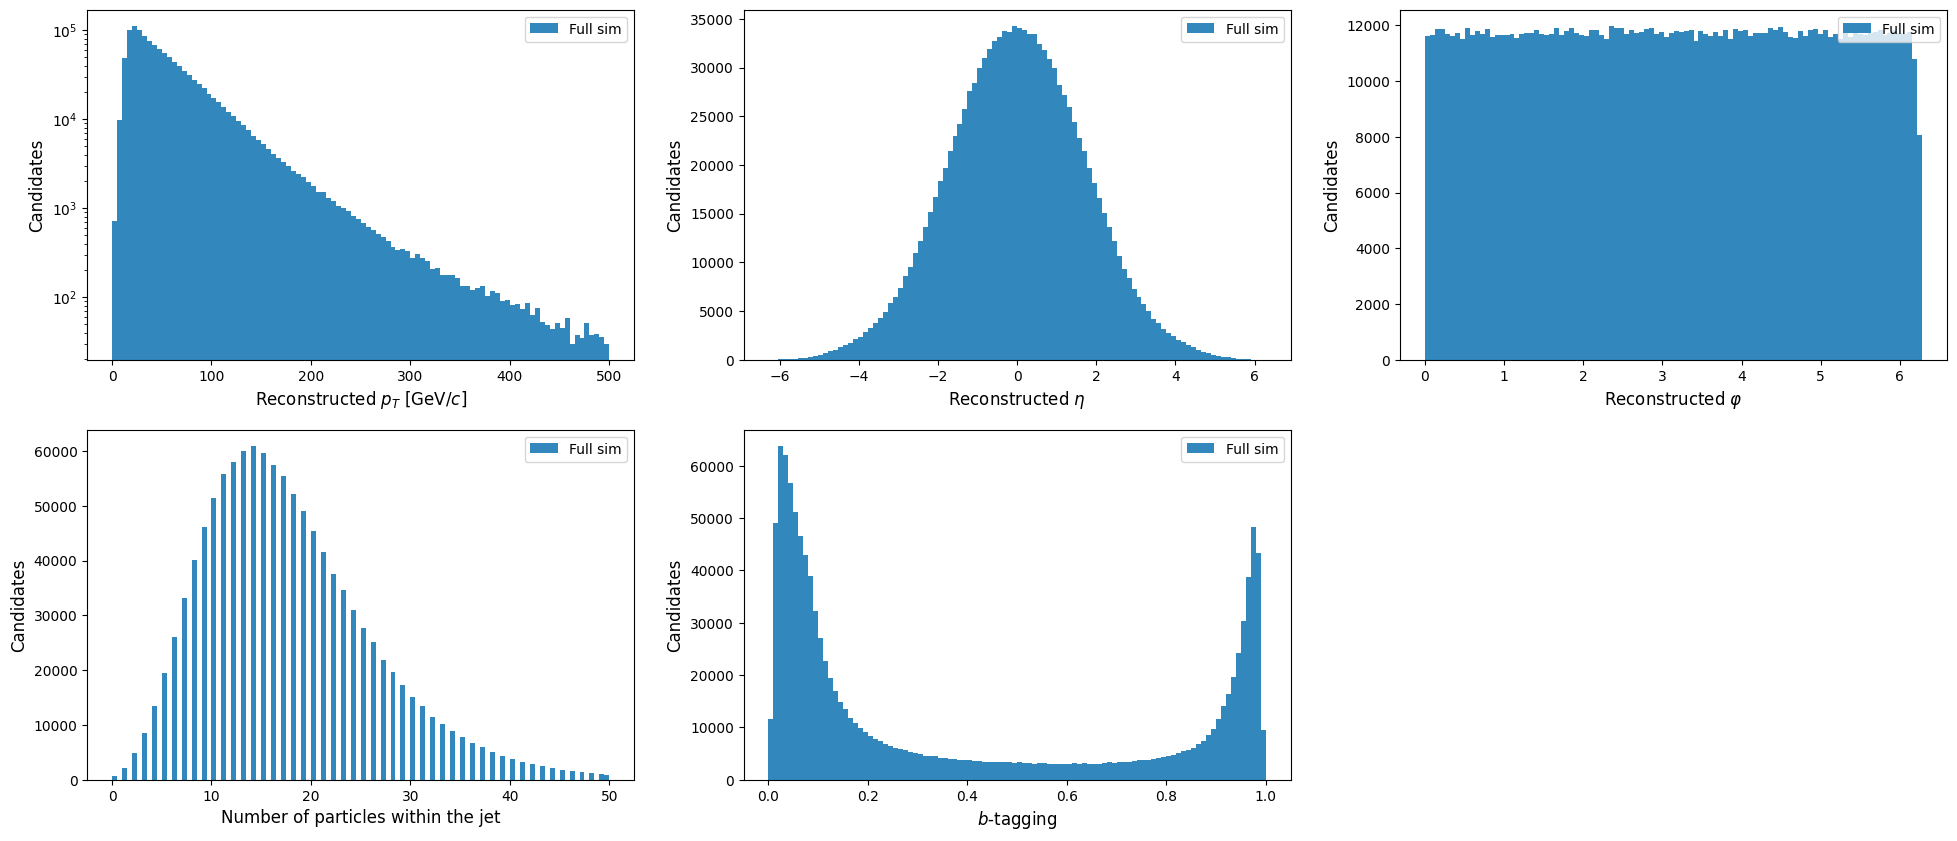

In [9]:
plt.figure(figsize=(24, 10), dpi=100)

plt.subplot(2, 3, 1)
plt.xlabel("Reconstructed $p_T$ [GeV/$c$]", fontsize=12)
plt.ylabel("Candidates", fontsize=12)
plt.hist(data["reco_pT"], bins=np.linspace(0.0, 500.0, 101), color="#3288bd", label="Full sim")
plt.legend(loc="upper right", fontsize=10)
plt.yscale("log")

plt.subplot(2, 3, 2)
plt.xlabel(r"Reconstructed $\eta$", fontsize=12)
plt.ylabel("Candidates", fontsize=12)
plt.hist(data["reco_eta"], bins=np.linspace(-2*np.pi, 2*np.pi, 101), color="#3288bd", label="Full sim")
plt.legend(loc="upper right", fontsize=10)

plt.subplot(2, 3, 3)
plt.xlabel(r"Reconstructed $\varphi$", fontsize=12)
plt.ylabel("Candidates", fontsize=12)
plt.hist(data["reco_phi"], bins=np.linspace(0.0, 2*np.pi, 101), color="#3288bd", label="Full sim")
plt.legend(loc="upper right", fontsize=10)

plt.subplot(2, 3, 4)
plt.xlabel("Number of particles within the jet", fontsize=12)
plt.ylabel("Candidates", fontsize=12)
plt.hist(data["reco_nConstituents"], bins=np.linspace(0.0, 50.0, 101), color="#3288bd", label="Full sim")
plt.legend(loc="upper right", fontsize=10)

plt.subplot(2, 3, 5)
plt.xlabel("$b$-tagging", fontsize=12)
plt.ylabel("Candidates", fontsize=12)
plt.hist(data["b_tag"], bins=np.linspace(0.0, 1.0, 101), color="#3288bd", label="Full sim")
plt.legend(loc="upper right", fontsize=10)

plt.show()

#### Correlation plots

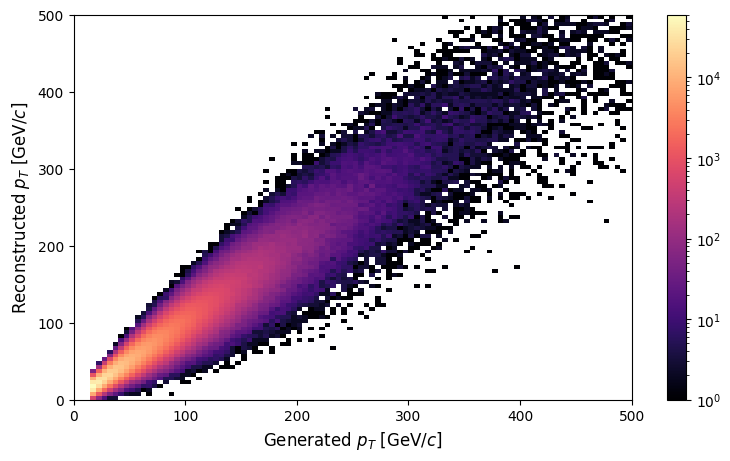

In [10]:
plt.figure(figsize=(9, 5), dpi=100)
plt.xlabel("Generated $p_T$ [GeV/$c$]", fontsize=12)
plt.ylabel("Reconstructed $p_T$ [GeV/$c$]", fontsize=12)

# plt.plot([0.0, 500.0], [0.0, 500.0], color="k", lw=1.0)
plt.hist2d(
    data["pT"],
    data["reco_pT"],
    norm=mpl.colors.LogNorm(vmin=1.0),
    bins=np.linspace(0.0, 500.0, 101),
    cmap="magma",
)
plt.colorbar()

plt.show()

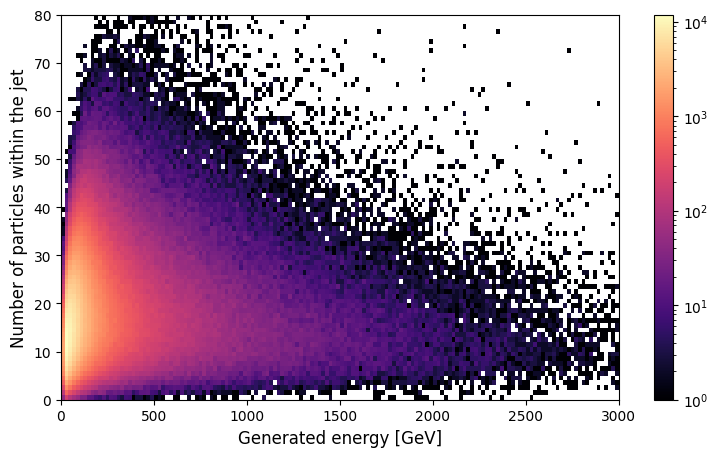

In [11]:
plt.figure(figsize=(9, 5), dpi=100)
plt.xlabel("Generated energy [GeV]", fontsize=12)
plt.ylabel("Number of particles within the jet", fontsize=12)

plt.hist2d(
    data["E"],
    data["reco_nConstituents"],
    norm=mpl.colors.LogNorm(vmin=1.0),
    bins=[np.linspace(0.0, 3000.0, 151), np.linspace(0.0, 80.0, 81)],
    cmap="magma",
)
plt.colorbar()

plt.show()

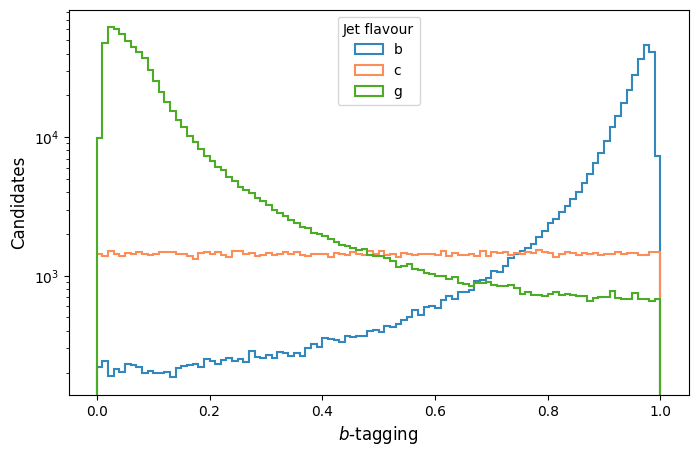

In [12]:
plt.figure(figsize=(8, 5), dpi=100)
plt.xlabel("$b$-tagging", fontsize=12)
plt.ylabel("Candidates", fontsize=12)

bins = np.linspace(0.0, 1.0, 101)
plt.hist(data[abs(data.flavour) == 5]["b_tag"], bins=bins, histtype="step", lw=1.5, color="#3288bd", label="b")
plt.hist(data[abs(data.flavour) == 4]["b_tag"], bins=bins, histtype="step", lw=1.5, color="#fc8d59", label="c")
plt.hist(data[abs(data.flavour) == 0]["b_tag"], bins=bins, histtype="step", lw=1.5, color="#4dac26", label="g")

plt.legend(title="Jet flavour", loc="upper center", fontsize=10)
plt.yscale("log")
plt.show()

#### Data preparation

As usual in a machine learning application, the data sample is split into **training** and **test sets**.

In [13]:
data = shuffle(data)

chunk_size = -1 if not LIVE else 500000
data = data[:chunk_size]

x_vars = ["pT", "eta", "phi", "E", "flavour"]
x = data[x_vars].values

y_vars = ["reco_pT", "reco_eta", "reco_phi", "reco_nConstituents", "b_tag"]
y = data[y_vars].values

train_ratio = 0.7
train_size = int(train_ratio * len(data))

x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"x_train shape: {x_train.shape} \t x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape} \t y_test shape: {y_test.shape}")

x_train shape: (350000, 5) 	 x_test shape: (150000, 5)
y_train shape: (350000, 5) 	 y_test shape: (150000, 5)


### Generative Adversarial Networks

#### Data preprocessing

To normalize the different ranges and orders of magnitude of input $x$ and output $y$ features highlighted by the previous histograms, we will use the scikit-learn [`QuantileTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html) and [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) preprocessing operators.

Since one of the $x$ features is categorical (`data.flavour`), the latter should be kept unchanged by the preprocessing operators and transformed through a [**one-hot**](https://en.wikipedia.org/wiki/One-hot) encoder.

If we want to combine together different preprocessing operators in one go, we can use the [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) class by scikit-learn.

In [14]:
x_scaler_gan = ColumnTransformer(
  [
    ("quantile", QuantileTransformer(output_distribution="normal"), (0, 3)),  # pT, E
    ("standard", StandardScaler(), (1, 2)),  # eta, phi
  ]
)
x_train_gan = x_scaler_gan.fit_transform(x_train[:, :-1])  # except 'flavour' column

pd.DataFrame(x_train_gan, columns=["pT", "E", "eta", "phi"]).describe()

,pT,E,eta,phi
count,350000.000000,350000.000000,3.500000e+05,3.500000e+05
mean,0.014663,0.012237,8.526513e-19,3.389390e-16
std,1.005009,1.003012,1.000001e+00,1.000001e+00
min,-5.199338,-5.199338,-3.569672e+00,-1.732516e+00
25%,-0.670184,-0.673460,-6.793200e-01,-8.658741e-01
50%,0.016933,0.022825,-1.135904e-03,-1.211743e-03
75%,0.694635,0.703091,6.801453e-01,8.664159e-01
max,5.199338,5.199338,3.701994e+00,1.730719e+00


In [15]:
label_encoder = LabelEncoder()
int_encoded = label_encoder.fit_transform(np.abs(x_train[:, -1]))  # 'flavour' column

onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(int_encoded[:, None])  # one-hot encoding

x_train_gan = np.concatenate([x_train_gan, onehot_encoded], axis=1)
x_train_gan.shape

(350000, 7)

Since most of the output $y$ features are the reconstructed version of the input $x$ features, we should build a model able to reproduce only the **errors** introduced in the detection and reconstruction steps instead of directly parameterize the reconstruction algorithms. This _regularizes_ the training procedure and may simplify any debugging campaign.

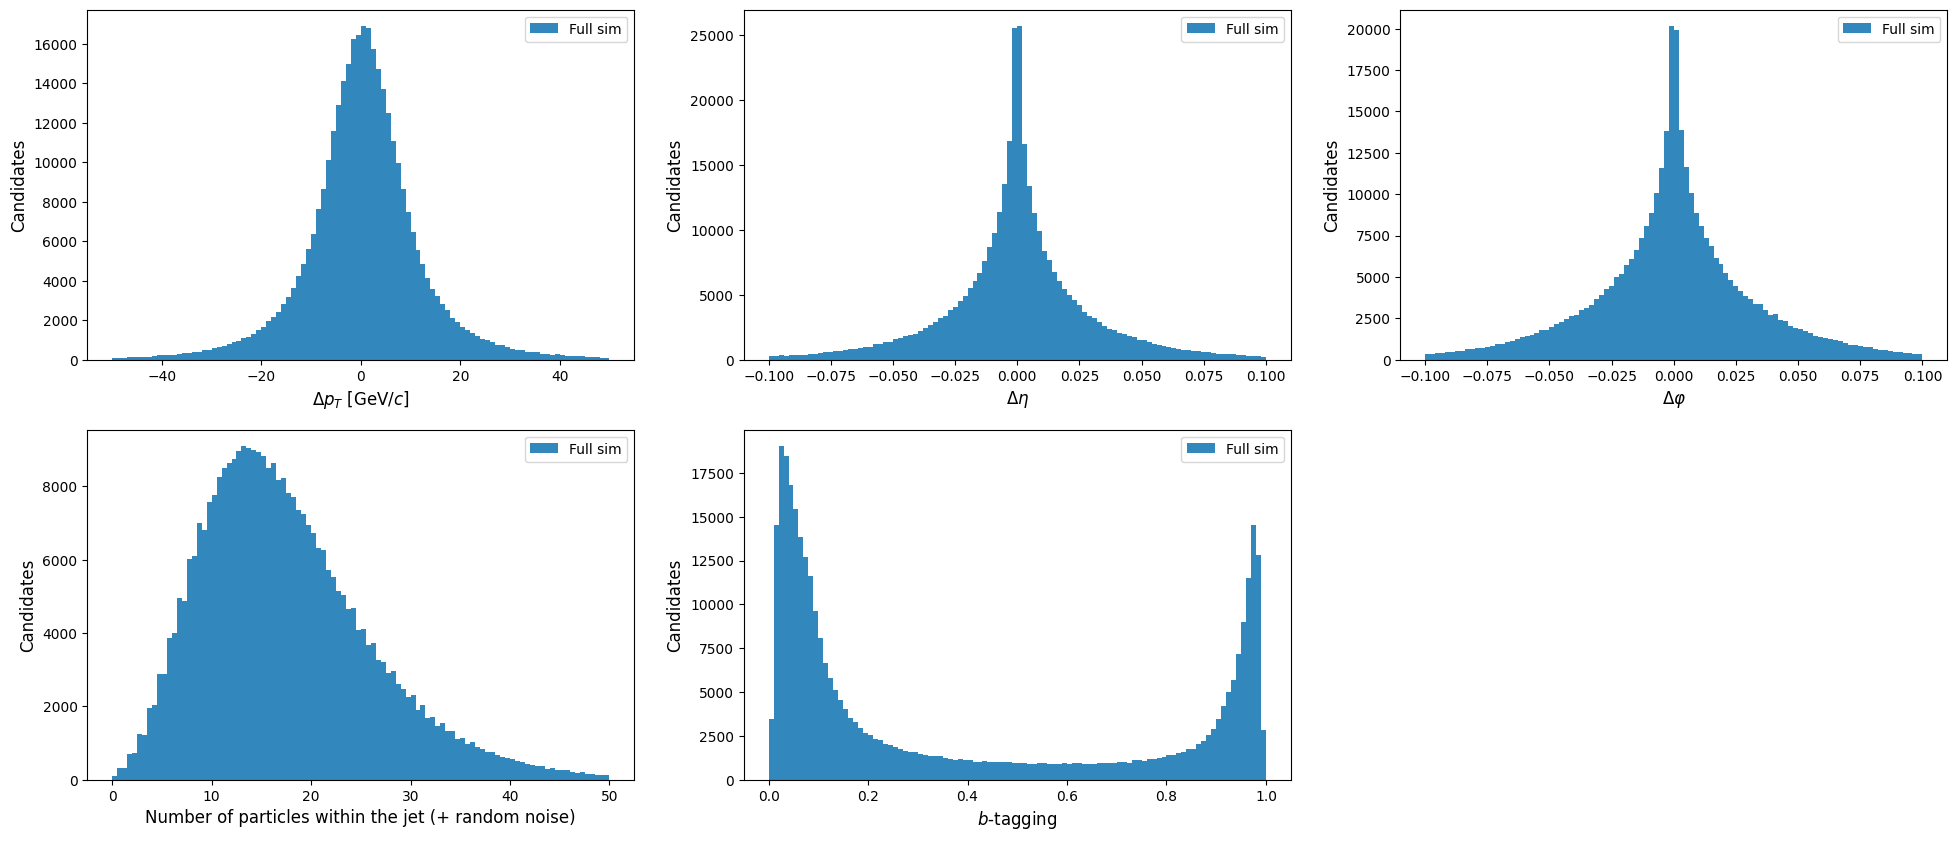

In [16]:
y_train_gan = y_train.copy()
y_train_gan[:, :3] -= x_train[:, :3]
y_train_gan[:, 3] += np.random.normal(0.0, 0.2, size=(len(y_train),))  # 'reco_nConstituents' from discrete to continous

plt.figure(figsize=(24, 10), dpi=100)

plt.subplot(2, 3, 1)
plt.xlabel("$\Delta p_T$ [GeV/$c$]", fontsize=12)
plt.ylabel("Candidates", fontsize=12)
plt.hist(y_train_gan[:, 0], bins=np.linspace(-50.0, 50.0, 101), color="#3288bd", label="Full sim")
plt.legend(loc="upper right", fontsize=10)

plt.subplot(2, 3, 2)
plt.xlabel(r"$\Delta \eta$", fontsize=12)
plt.ylabel("Candidates", fontsize=12)
plt.hist(y_train_gan[:, 1], bins=np.linspace(-0.1, 0.1, 101), color="#3288bd", label="Full sim")
plt.legend(loc="upper right", fontsize=10)

plt.subplot(2, 3, 3)
plt.xlabel(r"$\Delta \varphi$", fontsize=12)
plt.ylabel("Candidates", fontsize=12)
plt.hist(y_train_gan[:, 2], bins=np.linspace(-0.1, 0.1, 101), color="#3288bd", label="Full sim")
plt.legend(loc="upper right", fontsize=10)

plt.subplot(2, 3, 4)
plt.xlabel("Number of particles within the jet (+ random noise)", fontsize=12)
plt.ylabel("Candidates", fontsize=12)
plt.hist(y_train_gan[:, 3], bins=np.linspace(0.0, 50.0, 101), color="#3288bd", label="Full sim")
plt.legend(loc="upper right", fontsize=10)

plt.subplot(2, 3, 5)
plt.xlabel("$b$-tagging", fontsize=12)
plt.ylabel("Candidates", fontsize=12)
plt.hist(y_train_gan[:, 4], bins=np.linspace(0.0, 1.0, 101), color="#3288bd", label="Full sim")
plt.legend(loc="upper right", fontsize=10)

plt.show()

In [17]:
y_scaler_gan = QuantileTransformer(output_distribution="normal")
y_train_gan = y_scaler_gan.fit_transform(y_train_gan)

pd.DataFrame(y_train_gan, columns=y_vars).describe()

,reco_pT,reco_eta,reco_phi,reco_nConstituents,b_tag
count,350000.000000,350000.000000,350000.000000,350000.000000,350000.000000
mean,-0.007551,0.004874,-0.011004,0.020614,-0.024308
std,0.991935,0.992554,1.001147,1.005248,1.011036
min,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.674531,-0.653455,-0.680473,-0.653746,-0.714786
50%,-0.011737,-0.000071,-0.021804,0.021857,-0.027190
75%,0.677931,0.676758,0.663382,0.700758,0.659031
max,5.199338,5.199338,5.199338,5.199338,5.199338


#### Package presentation

Implementing a GAN in TensorFlow is straightforward, even if becoming familiar with the various tricks to stabilize the training procedure or moving from a GAN flavour to another may be non-trivial. The aim of this hands-on is to prove the effectiveness of generative models for HEP simulations, hence we will rely on [pidgan](https://github.com/mbarbetti/pidgan) for the GAN implementations. Such Python package has been designed in the context of LHCb flash-simulation and offers a wide set of GAN algorithms implemented customizing the TensorFlow [`Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model) class.

| Algorithms* | Lipschitzianity** | Design inspired by | Tutorial |
|:-----------:|:-----------------:|:------------------:|:--------:|
| [`GAN`](https://github.com/mbarbetti/pidgan/blob/main/src/pidgan/algorithms/GAN.py) | ❌ | [1][1], [2][2], [8][8] | [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mbarbetti/pidgan-notebooks/blob/main/tutorial-GAN-LHCb_RICH.ipynb) |
| [`BceGAN`](https://github.com/mbarbetti/pidgan/blob/main/src/pidgan/algorithms/BceGAN.py) | ❌ | [1][1], [2][2], [8][8] | [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mbarbetti/pidgan-notebooks/blob/main/tutorial-BceGAN-LHCb_RICH.ipynb) |
| [`LSGAN`](https://github.com/mbarbetti/pidgan/blob/main/src/pidgan/algorithms/LSGAN.py) | ❌ | [3][3], [2][2], [8][8] | [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mbarbetti/pidgan-notebooks/blob/main/tutorial-LSGAN-LHCb_RICH.ipynb) |
| [`WGAN`](https://github.com/mbarbetti/pidgan/blob/main/src/pidgan/algorithms/WGAN.py) | ✅ | [4][4], [8][8] | [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mbarbetti/pidgan-notebooks/blob/main/tutorial-WGAN-LHCb_RICH.ipynb) |
| [`WGAN_GP`](https://github.com/mbarbetti/pidgan/blob/main/src/pidgan/algorithms/WGAN_GP.py) | ✅ | [5][5], [8][8] | [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mbarbetti/pidgan-notebooks/blob/main/tutorial-WGAN_GP-LHCb_RICH.ipynb) |
| [`CramerGAN`](https://github.com/mbarbetti/pidgan/blob/main/src/pidgan/algorithms/CramerGAN.py) | ✅ | [6][6], [8][8] | [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mbarbetti/pidgan-notebooks/blob/main/tutorial-CramerGAN-LHCb_RICH.ipynb) |
| [`WGAN_ALP`](https://github.com/mbarbetti/pidgan/blob/main/src/pidgan/algorithms/WGAN_ALP.py) | ✅ | [7][7], [8][8] | [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mbarbetti/pidgan-notebooks/blob/main/tutorial-WGAN_ALP-LHCb_RICH.ipynb) |
| [`BceGAN_GP`](https://github.com/mbarbetti/pidgan/blob/main/src/pidgan/algorithms/BceGAN_GP.py) | ✅ | [1][1], [5][5], [8][8] | [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mbarbetti/pidgan-notebooks/blob/main/tutorial-BceGAN_GP-LHCb_RICH.ipynb) |
| [`BceGAN_ALP`](https://github.com/mbarbetti/pidgan/blob/main/src/pidgan/algorithms/BceGAN_ALP.py) | ✅ | [1][1], [7][7], [8][8] | [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mbarbetti/pidgan-notebooks/blob/main/tutorial-BceGAN_ALP-LHCb_RICH.ipynb) |

*each GAN algorithm is designed to operate taking __conditions__ as input [[10][10]]

**the GAN training is regularized to ensure that the discriminator encodes a 1-Lipschitz function

Training a GAN system corresponds to perform a competition, namely the **minimax game**, between the generator and discriminator networks. The latters are provided by the [pidgan](https://github.com/mbarbetti/pidgan) package through the [`players`](https://github.com/mbarbetti/pidgan/tree/main/src/pidgan/players) module that implements the two networks via custom TensorFlow [`Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model)s.

[1]: https://arxiv.org/abs/1406.2661
[2]: https://arxiv.org/abs/1701.04862
[3]: https://arxiv.org/abs/1611.04076
[4]: https://arxiv.org/abs/1701.07875
[5]: https://arxiv.org/abs/1704.00028
[6]: https://arxiv.org/abs/1705.10743
[7]: https://arxiv.org/abs/1907.05681
[8]: https://arxiv.org/abs/1606.03498
[10]: https://arxiv.org/abs/1411.1784

#### The generator

The **generator player** can be implemented with the high-level [`Generator`](https://github.com/mbarbetti/pidgan/blob/main/src/pidgan/players/generators/Generator.py) class that provides the neural network model wrapping the TensorFlow [Sequential API](https://www.tensorflow.org/guide/keras/sequential_model). Before to initialize a `Generator` instance, let's have a look at its arguments:

* **`output_dim`** (_int_) - Dimensionality of the generator output space.
* **`latent_dim`** (_int_) - Dimensionality of the latent space.
* **`num_hidden_layers`** (_int_, default=5) - Number of the hidden layers passed to the [`tf.keras.Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model. Each hidden layer has a LeakyReLU as activation function (see [`tf.keras.layers.LeakyReLU`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LeakyReLU)).
* **`mlp_hidden_units`** (_int_ or _array_like_, default=128) - Number of neuron units per each hidden layer. It can also be passed as an array of unit numbers having length equal to the number of hidden layers.
* **`mlp_dropout_rates`** (_float_ or _array_like_, default=0.0) - Fraction of the input neurons to drop per each hidden layer. It can also be passed as an array of float numbers having length equal to the number of hidden layers.
* **`output_activation`** (_activation_like_ or _None_, default=None) - Activation function to use in the generator output layer (see [`tf.keras.activations`](https://www.tensorflow.org/api_docs/python/tf/keras/activations)). If None, no activation is applied (i.e., "linear" activation: $a(x) = x$).
* **`name`** (_str_ of _None_, default=None) - The name of the generator model.
* **`dtype`** (_dtype_ or _None_, default=None) - The dtype of the generator layer computations and weights.

In [18]:
from pidgan.players.generators import Generator

generator = Generator(
    output_dim=y_train_gan.shape[-1],
    latent_dim=64,
    num_hidden_layers=5,
    mlp_hidden_units=128,
    mlp_dropout_rates=0.0,
    output_activation=None,
    name="generator"
)

2023-11-10 14:45:51.929098: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2529 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB MIG 1g.5gb, pci bus id: 0000:01:00.0, compute capability: 8.0


In [19]:
_ = generator(keras.Input(shape=x_train_gan.shape[1:]))
generator.summary()

Model: "generator_seq"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_0 (Dense)             (None, 128)               9216      
                                                                 
 leaky_relu_0 (LeakyReLU)    (None, 128)               0         
                                                                 
 dropout_0 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 leaky_relu_1 (LeakyReLU)    (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)             

#### The discriminator

The **discriminator player** can be implemented with the high-level [`Discriminator`](https://github.com/mbarbetti/pidgan/blob/main/src/pidgan/players/discriminators/Discriminator.py) class that provides the neural network model wrapping the TensorFlow [Sequential API](https://www.tensorflow.org/guide/keras/sequential_model). Again, before to initialize a `Discriminator` instance, let's have a look to its arguments:

* **`output_dim`** (_int_) - Dimensionality of the discriminator output space.
* **`num_hidden_layers`** (_int_, default=5) - Number of the hidden layers passed to the [`tf.keras.Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model. Each hidden layer has a LeakyReLU as activation function (see [`tf.keras.layers.LeakyReLU`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LeakyReLU)).
* **`mlp_hidden_units`** (_int_ or _array_like_, default=128) - Number of neuron units per each hidden layer. It can also be passed as an array of unit numbers having length equal to the number of hidden layers.
* **`mlp_dropout_rates`** (_float_ or _array_like_, default=0.0) - Fraction of the input neurons to drop per each hidden layer. It can also be passed as an array of float numbers having length equal to the number of hidden layers.
* **`output_activation`** (_activation_like_ or _None_, default="sigmoid") - Activation function to use in the dicriminator output layer (see [`tf.keras.activations`](https://www.tensorflow.org/api_docs/python/tf/keras/activations)). If None, no activation is applied (i.e., "linear" activation: $a(x) = x$).
* **`name`** (_str_ of _None_, default=None) - The name of the discriminator model.
* **`dtype`** (_dtype_ or _None_, default=None) - The dtype of the discriminator layer computations and weights.

In [20]:
from pidgan.players.discriminators import Discriminator

discriminator = Discriminator(
    output_dim=1,  # greater than 1 for CramerGAN
    num_hidden_layers=5,
    mlp_hidden_units=128,
    mlp_dropout_rates=0.0,
    output_activation=None,  # "sigmoid" for GAN, BceGAN and LSGAN, None otherwise
    name="discriminator"
)

In [21]:
_ = discriminator((keras.Input(shape=x_train_gan.shape[1:]), keras.Input(shape=y_train_gan.shape[1:])))
discriminator.summary()

Model: "discriminator_seq"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_0 (Dense)             (None, 128)               1664      
                                                                 
 leaky_relu_0 (LeakyReLU)    (None, 128)               0         
                                                                 
 dropout_0 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 leaky_relu_1 (LeakyReLU)    (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)         

#### The GAN algorithm

The **BceGAN-ALP algorithm** [[1][1], [7][7]] can be implemented with the high-level [`BceGAN_ALP`](https://github.com/mbarbetti/pidgan/blob/main/src/pidgan/algorithms/BceGAN_ALP.py) class that defines the training procedure of the two players customizing the TensorFlow [`Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model) class and, in particular, its `fit()` method. Once again, before to initialize a `BceGAN_ALP` instance, let's have a look at its arguments:

* **`generator`** (_generator_like_) - The generator network. It must be passed as a pidgan [`Generator`](https://github.com/mbarbetti/pidgan/blob/main/src/pidgan/players/generators/Generator.py) instance.
* **`discriminator`** (_discriminator_like_) - The discriminator network. It must be passed as a pidgan [`Discriminator`](https://github.com/mbarbetti/pidgan/blob/main/src/pidgan/players/discriminators/Discriminator.py) instance.
* **`lipschitz_penalty`** (_float_, default=1.0) - Importance of the regularization term ALP that implicitly constrains the discriminator to induce a 1-Lipschitz function as proposed in Ref. [[7][7]].
* **`lipschitz_penalty_strategy`** (_str_, default="one-sided") - If "two-sided" is passed, the Lipschitz constant computed along the virtual adversarial direction is forced to be equal to 1. When "one-sided" is preferred, only Lipschitz constant values greater than 1 are penalized.
* **`feature_matching_penalty`** (_float_, default=0.0) - Importance of the regularization term added to the generator training to force the hidden state of the discriminator to match between reference and generated examples. Its design follows from what proposed in Ref. [[8][8]].
* **`referee`** (_classifier_like_ or _None_, default=None) - When passed it enables the training of a third independent player: the referee network. It can be used to assess the quality of the generator output during the training. If passed, it must be a pidgan [`Classifier`](https://github.com/mbarbetti/pidgan/blob/main/src/pidgan/players/classifiers/Classifier.py) instance.
* **`name`** (_str_ or _None_, default="BceGAN_ALP") - The name of the BceGAN-ALP model.
* **`dtype`** (_dtype_ or _None_, default=None) - The dtype of the BceGAN-ALP model computations.

[1]: https://arxiv.org/abs/1406.2661
[7]: https://arxiv.org/abs/1907.05681
[8]: https://arxiv.org/abs/1606.03498

To not further complicate this tutorial, we avoid to use the referee network in this case, even if its initialization is straightforward:

```python
from pidgan.players.classifiers import Classifier

referee = Classifier(
    num_hidden_layers=5,
    mlp_hidden_units=128,
    mlp_dropout_rates=0.0,
    name="referee"
)
```

It's time to initialize a [`BceGAN_ALP`](https://github.com/mbarbetti/pidgan/blob/main/src/pidgan/algorithms/BceGAN_ALP.py) instance!

In [22]:
from pidgan.algorithms import BceGAN_ALP

gan = BceGAN_ALP(
    generator=generator,
    discriminator=discriminator,
    lipschitz_penalty=1.0,
    lipschitz_penalty_strategy="one-sided",
    feature_matching_penalty=0.0,
    referee=None,
    name="BceGAN_ALP",
)

#### Training procedure

To finalize the [`BceGAN_ALP`](https://github.com/mbarbetti/pidgan/blob/main/src/pidgan/algorithms/BceGAN_ALP.py) model preparation before to run the training procedure, we need to execute the `compile()` method. Differently from the TensorFlow `compile()` method, the [pidgan](https://github.com/mbarbetti/pidgan) one doesn't require to pass the loss function since it is encoded in the customized `gan.fit()` method. The arguments of the `gan.compile()` method follows:

* **`metrics`** (_list_ or _None_, default=None) - If not None, list of metrics to be evaluated by the BceGAN-GP model during training and testing. Each of this can be a string (name of a built-in pidgan function) or a [`pidgan.metrics`](https://github.com/mbarbetti/pidgan/tree/main/src/pidgan/metrics) instance.
* **`generator_optimizer`** (_optimizer_like_, default="rmsprop") - String (name of optimizer) or optimizer instance for the generator network (see [`tf.keras.optimizers`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)).
* **`discriminator_optimizer`** (_optimizer_like_, default="rmsprop") - String (name of optimizer) or optimizer instance for the discriminator network. (see [`tf.keras.optimizers`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)).
* **`generator_upds_per_batch`** (_int_, default=1) - Number of the generator weights updates per batch of data.
* **`discriminator_upds_per_batch`** (_int_, default=1) - Number of the discriminator weights updates per batch of data.
* **`virtual_adv_direction_upds`** (_int_, default=1) - Number of iterations to approximate the virtual adversarial direction per discriminator update as proposed in Ref. [[7][7]].
* **`referee_optimizer`** (_optimizer_like_ or _None_, default=None) - If not None, string (name of optimizer) or optimizer instance for the referee network (see [`tf.keras.optimizers`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)).
* **`referee_upds_per_batch`** (_int_ or _None_, default=None) - If not None, number of the referee weights updates per batch of data.

[7]: https://arxiv.org/abs/1907.05681

In [23]:
gan.compile(
    metrics=["wass_dist"],  # Wasserstein distance
    generator_optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    discriminator_optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    generator_upds_per_batch=1,
    discriminator_upds_per_batch=1,
    virtual_adv_direction_upds=1,
    referee_optimizer=None,
    referee_upds_per_batch=None,
)

The [pidgan](https://github.com/mbarbetti/pidgan) package provides several learning rate scheduling strategies through the [`callbacks.schedulers`](https://github.com/mbarbetti/pidgan/tree/main/src/pidgan/callbacks/schedulers) module. The pidgan schedulers are designed as [custom TensorFlow callbacks](https://www.tensorflow.org/guide/keras/writingyour_own_callbacks) that also allow to trace the learning rate value of each passed optimizer during the training. In this tutorial, we will use an exponential decay schedule both for the generator and discriminator networks:

<center>$\eta(t) = \eta_0 \cdot e^{- \alpha \cdot t / \tau}$</center>

where $\eta(t)$ indicates the learning rate value at a specific training step $t$, $\eta_0$ the initial learning rate, $\alpha$ the decay rate and $\tau$ the decay step.

In [24]:
from pidgan.callbacks.schedulers import LearnRateExpDecay

schedules = list()

g_lr_sched = LearnRateExpDecay(
    gan.generator_optimizer,
    decay_rate=0.1,
    decay_steps=75000,
    min_learning_rate=1e-6,
    verbose=True,
    key="g_lr",
)
schedules.append(g_lr_sched)

d_lr_sched = LearnRateExpDecay(
    gan.discriminator_optimizer,
    decay_rate=0.1,
    decay_steps=50000,
    min_learning_rate=1e-6,
    verbose=True,
    key="d_lr",
)
schedules.append(d_lr_sched)

Calling `gan.fit()` allows to perform the **minimax two-player game**, training the generator to reproduce the reference space $y$ on the basis of the conditions $x$ thanks to the discriminator feedbacks. The arguments taken by the pidgan `fit()` method are the same ones traditionally passed to a TensorFlow [`Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model) instance. The schedulers are passed through the `callbacks` argument and, since their verbosity has been enabled (`verbose` and `key` passed), the learning rates of both the generator and discriminator are printed during the training procedure.

In [25]:
start = datetime.now()

train = gan.fit(
    x=x_train_gan,
    y=y_train_gan,
    batch_size=512,
    epochs=150 if not LIVE else 50,
    validation_split=0.3,
    callbacks=schedules,
    verbose=1,
)

stop = datetime.now()

print(f"\nTraining procedure completed in {stop - start}")

Epoch 1/50


2023-11-10 14:45:52.647081: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-10 14:45:59.603899: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f556c003b30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-10 14:45:59.603948: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-PCIE-40GB MIG 1g.5gb, Compute Capability 8.0
2023-11-10 14:45:59.613018: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-10 14:45:59.759871: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-10 14:45:59.921326: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


479/479 [==============================] - 21s 23ms/step - g_loss: 0.8261 - d_loss: 0.6772 - wass_dist: -0.0174 - g_lr: 9.9268e-04 - d_lr: 9.8905e-04 - val_g_loss: 0.7159 - val_d_loss: 0.6938 - val_wass_dist: 0.0175
Epoch 2/50
479/479 [==============================] - 11s 23ms/step - g_loss: 0.6976 - d_loss: 0.6936 - wass_dist: 0.0022 - g_lr: 9.7819e-04 - d_lr: 9.6747e-04 - val_g_loss: 0.6920 - val_d_loss: 0.6940 - val_wass_dist: -7.9901e-04
Epoch 3/50
479/479 [==============================] - 10s 20ms/step - g_loss: 0.6961 - d_loss: 0.6931 - wass_dist: -0.0072 - g_lr: 9.6391e-04 - d_lr: 9.4637e-04 - val_g_loss: 0.6892 - val_d_loss: 0.6925 - val_wass_dist: -0.0084
Epoch 4/50
479/479 [==============================] - 10s 21ms/step - g_loss: 0.6961 - d_loss: 0.6931 - wass_dist: 0.0051 - g_lr: 9.4984e-04 - d_lr: 9.2572e-04 - val_g_loss: 0.6888 - val_d_loss: 0.6940 - val_wass_dist: -0.0038
Epoch 5/50
479/479 [==============================] - 10s 22ms/step - g_loss: 0.6953 - d_loss: 0.6

#### Learning curves

The following code cells report the **learning** and **metric curves** for the training just finished.

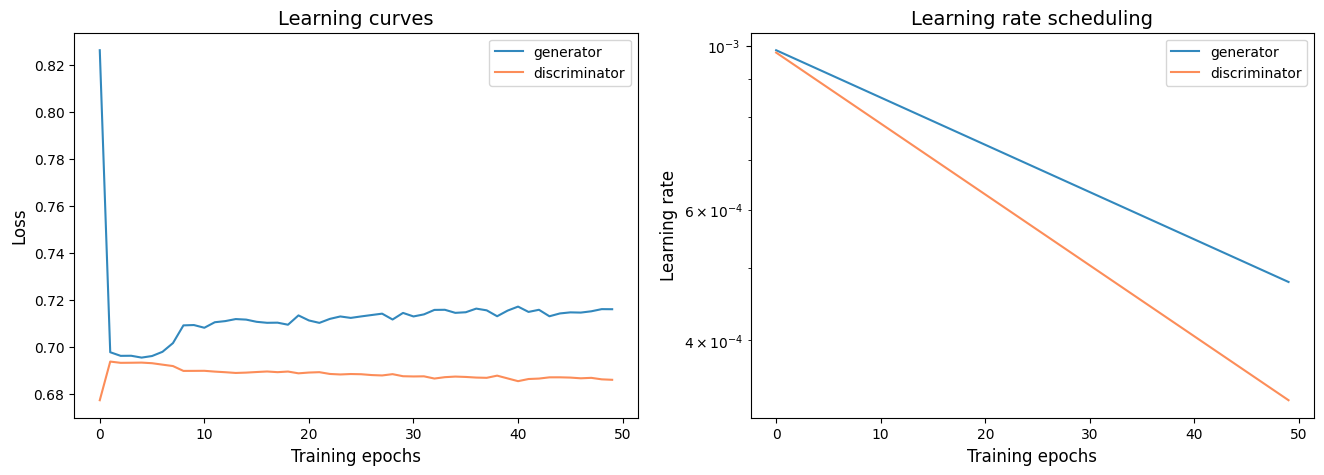

In [26]:
plt.figure(figsize=(16, 5), dpi=100)

plt.subplot(1, 2, 1)
plt.title("Learning curves", fontsize=14)
plt.xlabel("Training epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.plot(train.history["g_loss"], color="#3288bd", label="generator")
plt.plot(train.history["d_loss"], color="#fc8d59", label="discriminator")
plt.legend(loc="upper right", fontsize=10)

plt.subplot(1, 2, 2)
plt.title("Learning rate scheduling", fontsize=14)
plt.xlabel("Training epochs", fontsize=12)
plt.ylabel("Learning rate", fontsize=12)
plt.plot(train.history["g_lr"], color="#3288bd", label="generator")
plt.plot(train.history["d_lr"], color="#fc8d59", label="discriminator")
plt.legend(loc="upper right", fontsize=10)
plt.yscale("log")

plt.show()

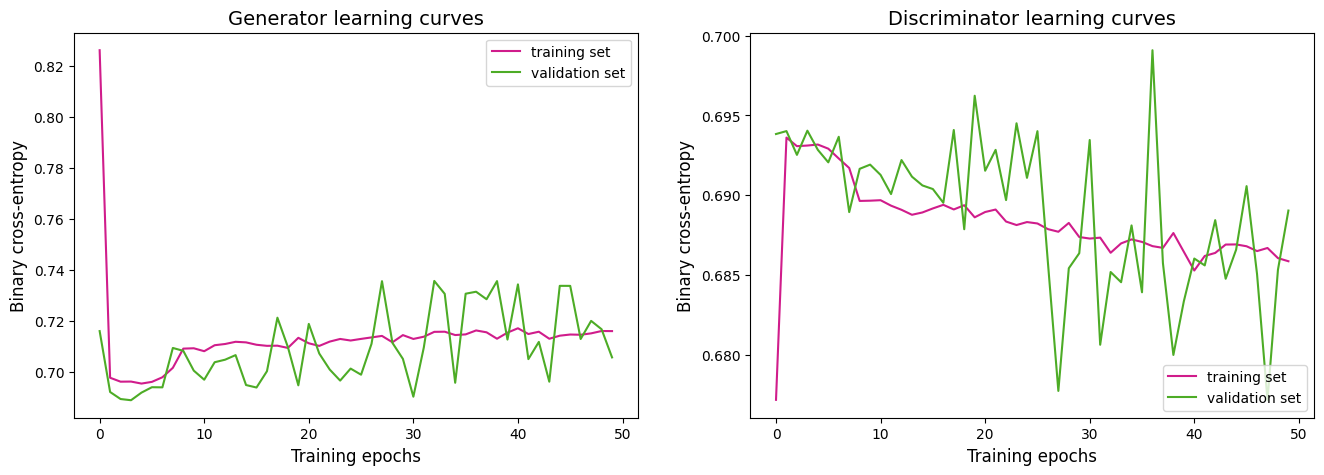

In [27]:
plt.figure(figsize=(16, 5), dpi=100)

plt.subplot(1, 2, 1)
plt.title("Generator learning curves", fontsize=14)
plt.xlabel("Training epochs", fontsize=12)
plt.ylabel(gan.loss_name, fontsize=12)
plt.plot(train.history["g_loss"], color="#d01c8b", label="training set")
plt.plot(train.history["val_g_loss"], color="#4dac26", label="validation set")
plt.legend(loc="upper right", fontsize=10)

plt.subplot(1, 2, 2)
plt.title("Discriminator learning curves", fontsize=14)
plt.xlabel("Training epochs", fontsize=12)
plt.ylabel(gan.loss_name, fontsize=12)
plt.plot(train.history["d_loss"], color="#d01c8b", label="training set")
plt.plot(train.history["val_d_loss"], color="#4dac26", label="validation set")
plt.legend(loc="lower right", fontsize=10)

plt.show()

#### Metric curves

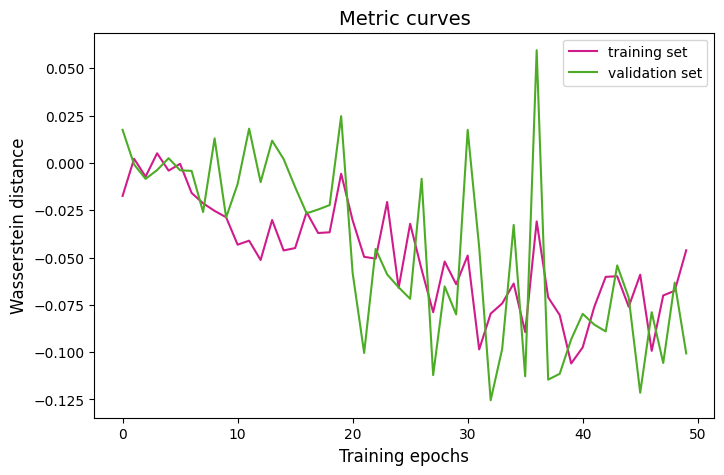

In [28]:
plt.figure(figsize=(8, 5), dpi=100)

plt.title("Metric curves", fontsize=14)
plt.xlabel("Training epochs", fontsize=12)
plt.ylabel("Wasserstein distance", fontsize=12)
plt.plot(train.history["wass_dist"], color="#d01c8b", label="training set")
plt.plot(train.history["val_wass_dist"], color="#4dac26", label="validation set")
plt.legend(loc=None, fontsize=10)

plt.show()

### Normalizing Flows

#### Data preprocessing

As done for the GAN-based model, also Normalizing Flows requires that the input $x$ and output $y$ features are standardized. To this end, we have defined the following custom class `DataProcessor` that encapsulates the data preprocessing to simplify data combination and range scaling.

In [29]:
class DataPreprocessor:
    def __init__(self, x, y, x_scaler=None, y_scaler=None, standardize=True):
        self.x = x.copy()
        self.y = y.copy()
        self.x_scaler = x_scaler
        self.y_scaler = y_scaler
        self.standardize = standardize

        # Transform some reco-level jet info
        self.x[:, -1] = np.abs(self.x[:, -1])  # 'flavour' column
        self.y[:, 0] /= self.x[:, 0]  # pT
        self.y[:, 3] += np.random.uniform(-0.5, 0.5, size=len(self.y)) # 'reco_nConstituents' from discrete to continous

        # Standardize input and output features
        if self.standardize:
            if not self.x_scaler and not self.y_scaler:
                self.x_scaler = StandardScaler()
                self.x_scaler.fit(self.x)
                self.y_scaler = StandardScaler()
                self.y_scaler.fit(self.y)
                
            self.x = self.x_scaler.transform(self.x)
            self.y = self.y_scaler.transform(self.y)

    def get_dataset(self):
        return self.x, self.y

    def invert_standardize(self, x_prep, y_prep):
        x = self.x_scaler.inverse_transform(x_prep)
        y = self.y_scaler.inverse_transform(y_prep)
        return x, y

Once transformed the training and test sets, we should _send_ the prepared data to the GPU (if available) as traditionally done for PyTorch applications. 

In [30]:
# Create preprocessors for training and testing datasets
train_preprocessor = DataPreprocessor(
    x=x_train,
    y=y_train,
)
x_train_nf, y_train_nf = train_preprocessor.get_dataset()

test_preprocessor = DataPreprocessor(
    x=x_test,
    y=y_test,
    x_scaler=train_preprocessor.x_scaler,
    y_scaler=train_preprocessor.y_scaler,
)
x_test_nf, y_test_nf = test_preprocessor.get_dataset()

# Send data to device (e.g., GPU)
x_train_nf = torch.tensor(x_train_nf).float().to(device)
y_train_nf = torch.tensor(y_train_nf).float().to(device)

# Invert standardization for test data
x_test_cpu, y_test_cpu = test_preprocessor.invert_standardize(x_test_nf, y_test_nf)
y_test_cpu[:, 0] *= x_test_cpu[:, 0]  # restore pT distribution

x_test_nf = torch.tensor(x_test_nf).float().to(device)
y_test_nf = torch.tensor(y_test_nf).float().to(device)

print(f"x_train_nf shape: {x_train_nf.shape} \t x_test_nf shape: {x_test_nf.shape}")
print(f"y_train_nf shape: {y_train_nf.shape} \t y_test_nf shape: {y_test_nf.shape}")

x_train_nf shape: torch.Size([350000, 5]) 	 x_test_nf shape: torch.Size([150000, 5])
y_train_nf shape: torch.Size([350000, 5]) 	 y_test_nf shape: torch.Size([150000, 5])


#### Model definition

The Flow-based model presented in this hands-on is designed for complex distributions and data transformations, and is made of several key components relying on the [nflows](https://github.com/bayesiains/nflows) package:

- **Base Distribution:** The model begins with a base distribution, specifically a standard normal distribution with a shape of `len(y_vars)`. This serves as the starting point for generating more complex distributions through a series of transformations.
- **Transformations:**
  1. **Random Permutation:** At each layer, a random permutation of the features is applied. This helps in correlating the input data, making the model more flexible.
  2. **Masked Affine Autoregressive Transform:** This transformation applies an affine transformation $y = Wx + c$, allowing the model to scale and shift the data in a complex, learned manner. The autoregressive property ensures that the transformation of each dimension depends only on the previous dimensions, making the Jacobian of the transform more tractable.
     - The transformation uses 3 blocks with 64 hidden features each, and batch normalization is employed to stabilize and speed up training.
- **Composite Transformation:** All the individual transformations across layers are combined into a single composite transformation. This sequential application of transformations allows the model to learn complex and high-dimensional distributions.
- **Flow Model:** The final model, termed `flow`, uses the composite transformation to mold the base distribution into the target distribution. It is capable of both forward and backward operations, crucial for tasks like density estimation and generative modeling.
- **Optimizer:** An Adam optimizer with a learning rate of 0.001 is used to train the model.

The use of autoregressive transformations allows for a powerful and flexible modeling of the data while maintaining computational efficiency.

In [31]:
from nflows.distributions.normal import StandardNormal
from nflows.transforms.permutations import RandomPermutation
from nflows.transforms.autoregressive import MaskedAffineAutoregressiveTransform
from nflows.transforms.base import CompositeTransform
from nflows.flows.base import Flow
from torch import optim


def build_flow(num_layers=1, learning_rate=0.001):
    base_dist = StandardNormal(shape=[len(y_vars)])
    transforms = []

    # Constructing layers of the flow model
    for _ in range(num_layers):
        transforms.append(RandomPermutation(features=len(y_vars)))
        transforms.append(MaskedAffineAutoregressiveTransform(
            features=len(y_vars),
            use_residual_blocks=False,
            num_blocks=3,
            hidden_features=64,
            use_batch_norm=True,
            context_features=len(x_vars)
        ))

    # Combining all transforms into a composite transform
    transform = CompositeTransform(transforms)

    # Creating the flow model with the specified transform and base distribution
    flow = Flow(transform, base_dist)

    # Optimizer for the flow model
    optimizer = optim.Adam(flow.parameters(), lr=learning_rate)

    return flow, optimizer

In [32]:
# Building the flow model and setting the device
flow, optimizer = build_flow(num_layers=10, learning_rate=0.001)
flow = flow.to(device)

# Print the number of trainable parameters in the model
print(f"Number of trainable parameters: {sum(p.numel() for p in flow.parameters() if p.requires_grad)}")

Number of trainable parameters: 142820


#### Training procedure

We are finally ready to design the training procedure:

In [33]:
from tqdm import tqdm

# Set training hyperparameters
start_epoch = 0
num_epochs = 150 if not LIVE else 50
batch_size = 2048
scheduler = None

train_history = []
test_history = []

start = datetime.now()
    
# Training procedure
for epoch in range(start_epoch, num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs - start_epoch}")
    
    flow.train()
    train_loss = torch.tensor(0.0).to(device)  # initialization

    # Loop over batches with a progress bar
    total_batches = (len(y_train_nf) + batch_size - 1) // batch_size
    with tqdm(total=total_batches, desc="Training", dynamic_ncols=True) as pbar:
        for i in range(0, len(y_train_nf), batch_size):
            x_batch = x_train_nf[i : i + batch_size]
            y_batch = y_train_nf[i : i + batch_size]

            optimizer.zero_grad()
            loss = -flow.log_prob(inputs=y_batch, context=x_batch).mean()
            train_loss += loss.item()
            loss.backward()
            optimizer.step()

            pbar.update(1)
            pbar.set_postfix({"batch_loss": loss.item()})

    train_loss /= total_batches
    train_history.append(train_loss.cpu().numpy())

    # Test phase
    with torch.no_grad():
        flow.eval()
        test_loss = torch.tensor(0.0).to(device)  # initialization

        for i in range(0, len(y_test_nf), batch_size):
            x_batch = x_test_nf[i : i + batch_size]
            y_batch = y_test_nf[i : i + batch_size]
            
            loss = -flow.log_prob(inputs=y_batch, context=x_batch).mean()
            test_loss += loss.item()
            
        test_loss /= total_batches
        test_history.append(test_loss.cpu().numpy())

    # Monitor loss and learning rate values
    for param_group in optimizer.param_groups:
        lr = param_group["lr"]
        print(f"loss: {train_loss:.4f} - lr: {lr:.4f} - test_loss: {test_loss:.4f}")
    
    # Learning rate scheduling (if any)
    if scheduler:
        scheduler.step(train_loss)
        
stop = datetime.now()
        
print(f"\nTraining procedure completed in {stop - start}")

Epoch 1/50


Training: 100%|██████████| 171/171 [00:04<00:00, 40.53it/s, batch_loss=3.07]


loss: 9.1772 - lr: 0.0010 - test_loss: 1.3901
Epoch 2/50


Training: 100%|██████████| 171/171 [00:04<00:00, 38.03it/s, batch_loss=0.214]


loss: 1.5754 - lr: 0.0010 - test_loss: 0.1876
Epoch 3/50


Training: 100%|██████████| 171/171 [00:04<00:00, 39.90it/s, batch_loss=-.629]   


loss: 0.0914 - lr: 0.0010 - test_loss: -0.2530
Epoch 4/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.57it/s, batch_loss=-1.1]  


loss: -0.4583 - lr: 0.0010 - test_loss: -0.4607
Epoch 5/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.53it/s, batch_loss=-1.39] 


loss: -0.7935 - lr: 0.0010 - test_loss: -0.5697
Epoch 6/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.17it/s, batch_loss=-1.6] 


loss: -1.0194 - lr: 0.0010 - test_loss: -0.6280
Epoch 7/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.45it/s, batch_loss=-1.77]


loss: -1.1857 - lr: 0.0010 - test_loss: -0.6547
Epoch 8/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.27it/s, batch_loss=-1.9] 


loss: -1.3219 - lr: 0.0010 - test_loss: -0.6955
Epoch 9/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.50it/s, batch_loss=-2]   


loss: -1.4450 - lr: 0.0010 - test_loss: -0.7313
Epoch 10/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.37it/s, batch_loss=-2.1] 


loss: -1.5618 - lr: 0.0010 - test_loss: -0.7627
Epoch 11/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.49it/s, batch_loss=-2.17]


loss: -1.6735 - lr: 0.0010 - test_loss: -0.7894
Epoch 12/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.41it/s, batch_loss=-2.21]


loss: -1.7781 - lr: 0.0010 - test_loss: -0.8363
Epoch 13/50


Training: 100%|██████████| 171/171 [00:04<00:00, 40.63it/s, batch_loss=-2.29]


loss: -1.8800 - lr: 0.0010 - test_loss: -0.8580
Epoch 14/50


Training: 100%|██████████| 171/171 [00:03<00:00, 43.79it/s, batch_loss=-2.36]


loss: -1.9751 - lr: 0.0010 - test_loss: -0.8664
Epoch 15/50


Training: 100%|██████████| 171/171 [00:04<00:00, 42.65it/s, batch_loss=-2.42]


loss: -2.0538 - lr: 0.0010 - test_loss: -0.8652
Epoch 16/50


Training: 100%|██████████| 171/171 [00:04<00:00, 42.68it/s, batch_loss=-2.47]


loss: -2.1236 - lr: 0.0010 - test_loss: -0.8703
Epoch 17/50


Training: 100%|██████████| 171/171 [00:04<00:00, 36.08it/s, batch_loss=-2.53]


loss: -2.1873 - lr: 0.0010 - test_loss: -0.8743
Epoch 18/50


Training: 100%|██████████| 171/171 [00:04<00:00, 40.81it/s, batch_loss=-2.56]


loss: -2.2435 - lr: 0.0010 - test_loss: -0.8750
Epoch 19/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.04it/s, batch_loss=-2.6] 


loss: -2.2959 - lr: 0.0010 - test_loss: -0.8624
Epoch 20/50


Training: 100%|██████████| 171/171 [00:03<00:00, 43.84it/s, batch_loss=-2.65]


loss: -2.3450 - lr: 0.0010 - test_loss: -0.8773
Epoch 21/50


Training: 100%|██████████| 171/171 [00:03<00:00, 43.81it/s, batch_loss=-2.68]


loss: -2.3906 - lr: 0.0010 - test_loss: -0.8742
Epoch 22/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.20it/s, batch_loss=-2.72]


loss: -2.4335 - lr: 0.0010 - test_loss: -0.8766
Epoch 23/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.07it/s, batch_loss=-2.74]


loss: -2.4729 - lr: 0.0010 - test_loss: -0.8771
Epoch 24/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.40it/s, batch_loss=-2.78]


loss: -2.5092 - lr: 0.0010 - test_loss: -0.8892
Epoch 25/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.25it/s, batch_loss=-2.81]


loss: -2.5453 - lr: 0.0010 - test_loss: -0.8919
Epoch 26/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.28it/s, batch_loss=-2.83]


loss: -2.5793 - lr: 0.0010 - test_loss: -0.8977
Epoch 27/50


Training: 100%|██████████| 171/171 [00:04<00:00, 41.81it/s, batch_loss=-2.87]


loss: -2.6102 - lr: 0.0010 - test_loss: -0.8984
Epoch 28/50


Training: 100%|██████████| 171/171 [00:04<00:00, 42.54it/s, batch_loss=-2.9] 


loss: -2.6406 - lr: 0.0010 - test_loss: -0.9010
Epoch 29/50


Training: 100%|██████████| 171/171 [00:04<00:00, 42.70it/s, batch_loss=-2.94]


loss: -2.6676 - lr: 0.0010 - test_loss: -0.8971
Epoch 30/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.93it/s, batch_loss=-2.97]


loss: -2.6956 - lr: 0.0010 - test_loss: -0.9007
Epoch 31/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.15it/s, batch_loss=-2.99]


loss: -2.7228 - lr: 0.0010 - test_loss: -0.9290
Epoch 32/50


Training: 100%|██████████| 171/171 [00:04<00:00, 39.19it/s, batch_loss=-3.01]


loss: -2.7486 - lr: 0.0010 - test_loss: -0.9399
Epoch 33/50


Training: 100%|██████████| 171/171 [00:04<00:00, 37.63it/s, batch_loss=-3.04]


loss: -2.7752 - lr: 0.0010 - test_loss: -0.9517
Epoch 34/50


Training: 100%|██████████| 171/171 [00:03<00:00, 43.26it/s, batch_loss=-3.07]


loss: -2.7983 - lr: 0.0010 - test_loss: -0.9605
Epoch 35/50


Training: 100%|██████████| 171/171 [00:04<00:00, 42.10it/s, batch_loss=-3.1] 


loss: -2.8221 - lr: 0.0010 - test_loss: -0.9790
Epoch 36/50


Training: 100%|██████████| 171/171 [00:04<00:00, 42.67it/s, batch_loss=-3.12]


loss: -2.8443 - lr: 0.0010 - test_loss: -0.9947
Epoch 37/50


Training: 100%|██████████| 171/171 [00:03<00:00, 43.04it/s, batch_loss=-3.14]


loss: -2.8683 - lr: 0.0010 - test_loss: -0.9853
Epoch 38/50


Training: 100%|██████████| 171/171 [00:04<00:00, 42.51it/s, batch_loss=-3.16]


loss: -2.8902 - lr: 0.0010 - test_loss: -0.9817
Epoch 39/50


Training: 100%|██████████| 171/171 [00:04<00:00, 41.36it/s, batch_loss=-3.18]


loss: -2.9115 - lr: 0.0010 - test_loss: -0.9904
Epoch 40/50


Training: 100%|██████████| 171/171 [00:04<00:00, 37.37it/s, batch_loss=-3.19]


loss: -2.9308 - lr: 0.0010 - test_loss: -0.9774
Epoch 41/50


Training: 100%|██████████| 171/171 [00:04<00:00, 38.80it/s, batch_loss=-3.2] 


loss: -2.9495 - lr: 0.0010 - test_loss: -0.9824
Epoch 42/50


Training: 100%|██████████| 171/171 [00:03<00:00, 43.96it/s, batch_loss=-3.21]


loss: -2.9672 - lr: 0.0010 - test_loss: -0.9756
Epoch 43/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.58it/s, batch_loss=-3.22]


loss: -2.9821 - lr: 0.0010 - test_loss: -0.9742
Epoch 44/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.80it/s, batch_loss=-3.24]


loss: -2.9964 - lr: 0.0010 - test_loss: -0.9819
Epoch 45/50


Training: 100%|██████████| 171/171 [00:03<00:00, 43.47it/s, batch_loss=-3.25]


loss: -3.0128 - lr: 0.0010 - test_loss: -0.9943
Epoch 46/50


Training: 100%|██████████| 171/171 [00:04<00:00, 42.36it/s, batch_loss=-3.25]


loss: -3.0274 - lr: 0.0010 - test_loss: -1.0157
Epoch 47/50


Training: 100%|██████████| 171/171 [00:04<00:00, 38.11it/s, batch_loss=-3.26]


loss: -3.0424 - lr: 0.0010 - test_loss: -1.0342
Epoch 48/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.57it/s, batch_loss=-3.27]


loss: -3.0566 - lr: 0.0010 - test_loss: -1.0602
Epoch 49/50


Training: 100%|██████████| 171/171 [00:03<00:00, 44.11it/s, batch_loss=-3.27]


loss: -3.0683 - lr: 0.0010 - test_loss: -1.0892
Epoch 50/50


Training: 100%|██████████| 171/171 [00:04<00:00, 41.17it/s, batch_loss=-3.26]


loss: -3.0768 - lr: 0.0010 - test_loss: -1.1137

Training procedure completed in 0:03:45.178607


#### Learning curves

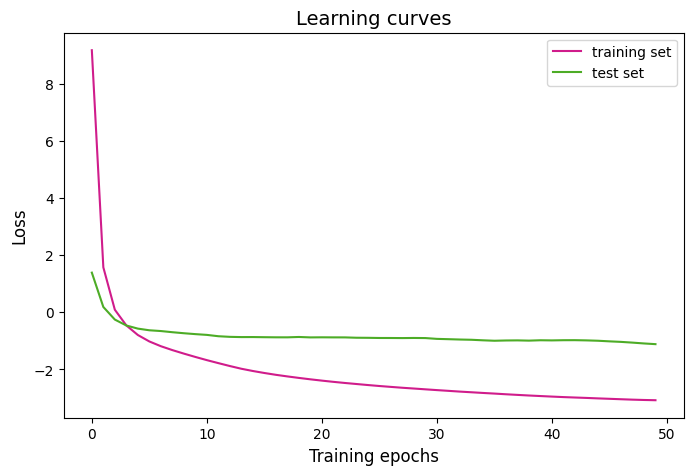

In [34]:
plt.figure(figsize=(8, 5), dpi=100)

plt.title("Learning curves", fontsize=14)
plt.xlabel("Training epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.plot(np.array(train_history), color="#d01c8b", label="training set")
plt.plot(np.array(test_history), color="#4dac26", label="test set")
plt.legend(loc="upper right", fontsize=10)

plt.show()

### Validation plots

Completed the training procedure for both the GAN-based and Flow-based models, the following code cells are designed to perform a comparison between the performance of the two parameterizations.

#### Generative Adversarial Networks

The **generator network**, once trained, produces synthetic data distributed like the reference dataset as long as the training procedure accomplishes the simulation task.

In [35]:
x_test_gan = x_scaler_gan.transform(x_test[:, :-1])  # input pre-processing

int_encoded = label_encoder.transform(np.abs(x_test[:, -1]))  # 'flavour' column
onehot_encoded = onehot_encoder.transform(int_encoded[:, None])  # one-hot encoding

x_test_gan = np.concatenate([x_test_gan, onehot_encoded], axis=1)

In [36]:
gan_out_test = gan.generate(x_test_gan, seed=np.random.randint(0, 999)).numpy()
gan_samples = y_scaler_gan.inverse_transform(gan_out_test)  # output post-processing

gan_samples[:, :3] += x_test[:, :3]  # restore pT, eta, phi distributions
gan_samples[:, 3] = np.rint(gan_samples[:, 3])  # from continous to discrete

#### Normalizing Flows

The **normalizing flows**, once trained, parameterizes the distribution of the reference dataset and allows to generate new synthetic data via sampling.

In [37]:
flow.eval()
samples_list = []

with torch.no_grad():
    with tqdm(total=(len(y_test_nf) + batch_size - 1) // batch_size, desc="Sampling", dynamic_ncols=True) as pbar:
        for i in range(0, len(y_test_nf), batch_size):
            x_batch = x_test_nf[i : i + batch_size]  # context batch

            nf_out = flow.sample(1, context=x_batch)  # sampling
            samples_list.append(nf_out.detach().cpu().numpy())
            pbar.update(1)

# Processing the sampled data (NF output)
nf_samples = np.concatenate(samples_list, axis=0)
nf_samples = nf_samples.reshape((-1, y_test_cpu.shape[1]))
nf_samples = test_preprocessor.y_scaler.inverse_transform(nf_samples)

# Adjust pT distribution and apply rounding
nf_samples[:, 0] *= x_test_cpu[:, 0]
nf_samples[:, 3] = np.rint(nf_samples[:, 3])

Sampling: 100%|██████████| 74/74 [00:02<00:00, 31.24it/s]


#### Histograms and ratios

In [38]:
def plot_histos_and_ratios(
        data_sim, 
        gan_model,
        nf_model,
        bins=None,
        feat_names=None,
        clipping=False,
    ):
    
    assert data_sim.shape == gan_model.shape
    assert data_sim.shape == nf_model.shape
    
    if feat_names is None:
        feat_names = [f"feature #{i}" for i in range(data_sim.shape[1])]
    ncols = len(feat_names)

    if bins is not None:
        if isinstance(bins, (int, float)):
            bins_list = [bins for i in range(ncols)]
        else:
            assert len(bins) == ncols
            bins_list = bins
    else:
        bins_list = [50 for i in range(ncols)]
    
    fig, axes = plt.subplots(
        nrows=2,
        ncols=ncols,
        figsize=(6 * ncols, 5),
        gridspec_kw={"height_ratios": [3, 1]}
    )

    for j, (h_ax, r_ax, bins) in enumerate(zip(axes[0], axes[1], bins_list)):
        
        # Histogram plot for fully simulated samples
        h_data, bins_, _ = h_ax.hist(data_sim[:, j], bins=bins, color="#bababa", label="Full sim")

        # Histogram plot for GAN-based model
        if clipping:
            gan_model_clip = np.clip(gan_model[:, j], bins_.min(), bins_.max())
        else:
            gan_model_clip = gan_model[:, j].copy()
        h_gan, _, _, = h_ax.hist(gan_model_clip, bins=bins, histtype="step", lw=2.0, color="#0571b0", label="GAN model")
        
        # Histogram plot for Flow-based model
        if clipping:
            nf_model_clip = np.clip(nf_model[:, j], bins_.min(), bins_.max())
        else:
            nf_model_clip = nf_model[:, j].copy()
        h_nf, _, _, = h_ax.hist(nf_model_clip, bins=bins, histtype="step", lw=2.0, color="#ca0020", label="Flow model")

        # Compute and plot the histogram ratios
        bin_centers = 0.5 * (bins_[1:] + bins_[:-1])
        h_data_safe = np.where(h_data > 0.0, h_data, 1e-8)
        gan_ratio = np.where(h_data > 0.0, h_gan / h_data_safe, 0.0)
        r_ax.plot(bin_centers, gan_ratio, color="#0571b0", marker="x", markersize=5.0, linestyle="")
        nf_ratio = np.where(h_data > 0.0, h_nf / h_data_safe, 0.0)
        r_ax.plot(bin_centers, nf_ratio, color="#ca0020", marker="+", markersize=5.0, linestyle="")
        r_ax.axhline(y=1, color="k", linestyle="--", lw=1.0)

        # Set up labels and legend
        h_ax.legend(loc=None, fontsize=10)
        if j == 0:
            h_ax.set_ylabel("Candidates", fontsize=12)
            r_ax.set_ylabel("Ratio", fontsize=12)
        r_ax.set_xlabel(feat_names[j], fontsize=12)
        r_ax.set_ylim(0.5, 1.5)  # Set the y-axis range for clarity

    # Adjust the layout for better readability
    plt.subplots_adjust()
    plt.show()

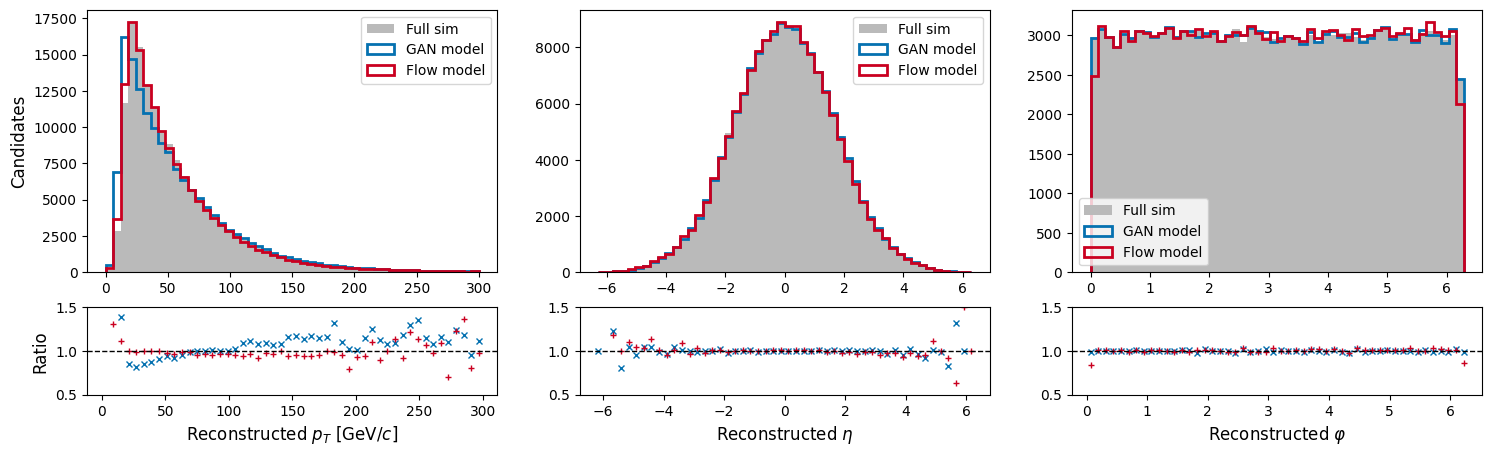

In [39]:
plot_histos_and_ratios(
    data_sim=y_test[:, :3],
    gan_model=gan_samples[:, :3],
    nf_model=nf_samples[:, :3],
    bins=[
        np.linspace(0.0, 300.0, 51),
        np.linspace(-2*np.pi, 2*np.pi, 51),
        np.linspace(0.0, 2*np.pi, 51),
    ],
    feat_names=[
        "Reconstructed $p_T$ [GeV/$c$]",
        r"Reconstructed $\eta$",
        r"Reconstructed $\varphi$",
    ],
    clipping=False,
)

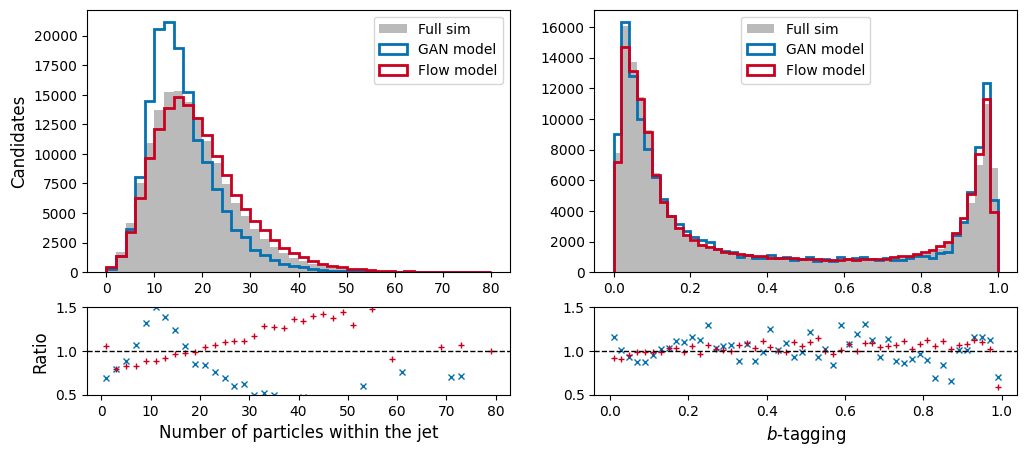

In [40]:
plot_histos_and_ratios(
    data_sim=y_test[:, 3:],
    gan_model=gan_samples[:, 3:],
    nf_model=nf_samples[:, 3:],
    bins=[
        np.linspace(0.0, 80.0, 41),
        np.linspace(0.0, 1.0, 51),
    ],
    feat_names=[
        "Number of particles within the jet",
        "$b$-tagging",
    ],
    clipping=False,
)

#### Correlation plots

In [53]:
from corner import corner


def make_corner_plot(
        data_sim, 
        gan_model,
        nf_model,
        bins=None,
        feat_names=None,
    ):
    
    # Define ranges and labels for the corner plot
    ranges = [
        (0.0, 300.0),         # pT
        (-2*np.pi, 2*np.pi),  # eta
        (0, 2*np.pi),         # phi
        (0.0, 80.0),          # nConstituents
        (-0.05, 1.05),        # b-tag
    ]
    labels = ["reco $p_T$", r"reco $\eta$", r"reco $\varphi$", "nConstituents", "$b$-tagging"]
    
    bins = 20
    hist_bin_factor = 2
    
    # Corner plot for GAN-based model
    fig = corner(gan_model, range=ranges, labels=labels, color="#0571b0", levels=[0.5, 0.9, 0.99],
                        bins=bins, hist_bin_factor=hist_bin_factor, scale_hist=True, plot_datapoints=False,
                        hist_kwargs={"ls": "-", "lw": 1.5}, contour_kwargs={"linestyles": "-"},
                        label_kwargs={"fontsize": 12})

    # Corner plot for Flow-based model
    fig = corner(nf_model, range=ranges, color="#ca0020", levels=[0.5, 0.9, 0.99],
                        bins=bins, hist_bin_factor=hist_bin_factor, scale_hist=True, plot_datapoints=False,
                        hist_kwargs={"ls": "-", "lw": 1.5}, contour_kwargs={"linestyles": "-"},
                        label_kwargs={"fontsize": 12}, fig=fig)
    
    # Corner plot for fully simulated samples
    fig = corner(data_sim, range=ranges, color="#999999", levels=[0.5, 0.9, 0.99],
                        bins=bins, hist_bin_factor=hist_bin_factor, scale_hist=True, plot_datapoints=False, 
                        hist_kwargs={"histtype": "bar", "alpha": 0.7}, contour_kwargs={"linestyles": "--"},
                        label_kwargs={"fontsize": 12}, fig=fig)

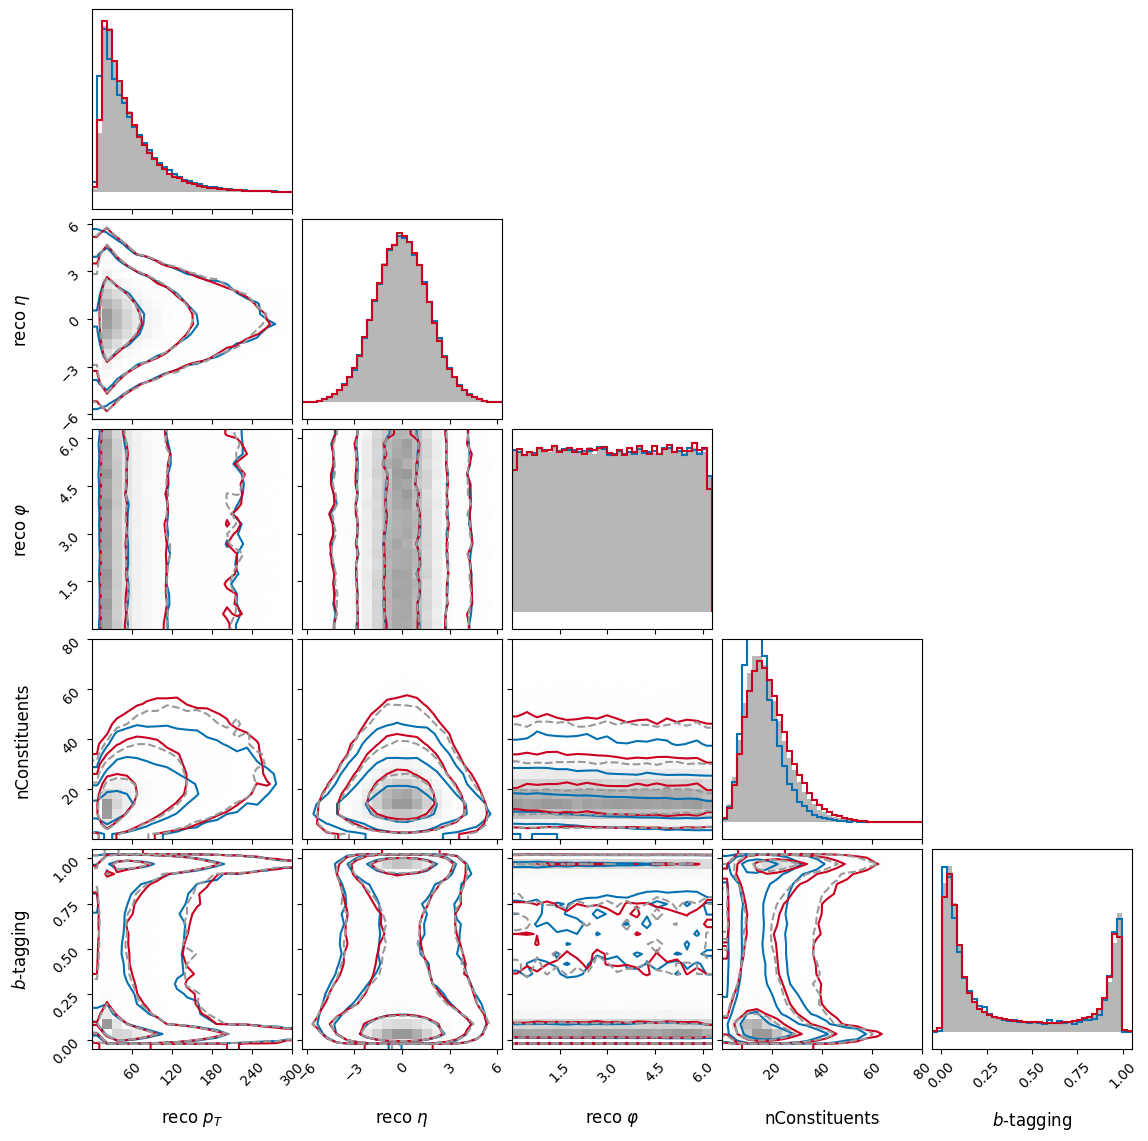

In [54]:
make_corner_plot(y_test, gan_samples, nf_samples)

## References

1. I.J. Goodfellow _et al._, "Generative Adversarial Networks", [arXiv:1406.2661](https://arxiv.org/abs/1406.2661)
2. M. Arjovsky, L. Bottou, "Towards Principled Methods for Training Generative Adversarial Networks", [arXiv:1701.04862](https://arxiv.org/abs/1701.04862)
3. X. Mao _et al._, "Least Squares Generative Adversarial Networks", [arXiv:1611.04076](https://arxiv.org/abs/1611.04076)
4. M. Arjovsky, S. Chintala, L. Bottou, "Wasserstein GAN", [arXiv:1701.07875](https://arxiv.org/abs/1701.07875)
5. I. Gulrajani _et al._, "Improved Training of Wasserstein GANs", [arXiv:1704.00028](https://arxiv.org/abs/1704.00028)
6. M.G. Bellemare _et al._, "The Cramer Distance as a Solution to Biased Wasserstein Gradients", [arXiv:1705.10743](https://arxiv.org/abs/1705.10743)
7. D. Terjék, "Adversarial Lipschitz Regularization", [arXiv:1907.05681](https://arxiv.org/abs/1907.05681)
8. T. Salimans _et al._, "Improved Techniques for Training GANs", [arXiv:1606.03498](https://arxiv.org/abs/1606.03498)
9. G. Papamakarios _et al._, "Normalizing Flows for Probabilistic Modeling and Inference", [arXiv:1912.02762](https://arxiv.org/abs/1912.02762)
10. M. Mirza, S. Osindero, "Conditional Generative Adversarial Nets", [arXiv:1411.1784](https://arxiv.org/abs/1411.1784)

## Credits
This hands-on is based on the tutorials provided by the [pidgan](https://github.com/mbarbetti/pidgan) package.